In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scanpy as sc

In [2]:
adata = sc.read_h5ad("seurat_withscreen/data_integrated_SCT_50PCs_all_screencells.h5ad")

/links/groups/treutlein/USERS/jjans/anaconda3/envs/py_jjans_3.10_scanpy/lib/python3.10/site-packages/anndata/compat/__init__.py:311: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [5]:
integrated_umap = pd.DataFrame(adata.obsm['X_umap'],index=adata.obs_names,columns=['UMAP_1','UMAP_2'])

/links/groups/treutlein/USERS/jjans/anaconda3/envs/py_jjans_3.10_scanpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


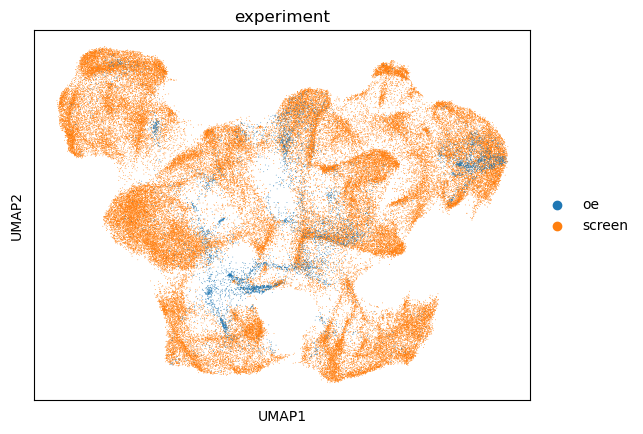

In [6]:
sc.pl.umap(adata,color='experiment')

In [7]:
adata

AnnData object with n_obs × n_vars = 96179 × 4194
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'percent_mito', 'n_counts', 'outlier', 'mt_outlier', 'doublet_score', 'predicted_doublet', 'M_XAV', 'M_CHIR', 'M_RA', 'M_FGF8', 'M_BMP4', 'M_SHH', 'M_CycA', 'FB_NFATC1', 'FB_LEF1', 'FB_LHX4', 'FB_NEUROD1', 'FB_PHOX2B', 'FB_LHX9', 'FB_MSX1', 'FB_ZFHX3', 'FB_TLX2', 'FB_TCF7L2', 'FB_TCF7L1', 'FB_EGFP', 'FB_SMAD9', 'FB_RXRG', 'FB_RARB', 'FB_NFIA', 'FB_MEIS2', 'FB_HOXB3', 'TF_NFATC1', 'TF_LEF1', 'TF_LHX4', 'TF_NEUROD1', 'TF_PHOX2B', 'TF_LHX9', 'TF_MSX1', 'TF_ZFHX3', 'TF_TLX2', 'TF_TCF7L2', 'TF_TCF7L1', 'TF_EGFP', 'TF_SMAD9', 'TF_RXRG', 'TF_RARB', 'TF_NFIA', 'TF_MEIS2', 'TF_HOXB3', 'pred_label', 'final_label', 'experiment', 'perce

In [8]:
umap_df = pd.DataFrame(adata.obsm['X_umap'],index=adata.obs_names,columns=['umap_1','umap_2'])
meta = adata.obs.copy()

meta = pd.merge(meta,umap_df,left_index=True,right_index=True)

meta_oe2 = pd.read_csv("classifier_results/XGB_classifier_extraEGFP_0.85_precision.tsv",sep="\t",index_col=0)
common_cells = list(set(meta_oe2.index)&set(meta.index))
meta_oe2 = meta_oe2.loc[common_cells]
meta.loc[meta_oe2.index,'final_label'] = meta_oe2['final_label']
meta.loc[meta_oe2.index,'pred_label'] = meta_oe2['pred_label']
meta.loc[meta_oe2.index,'combined_label'] = meta_oe2['combined_label']

In [9]:
meta

orig.ident  nCount_RNA  nFeature_RNA         sample  \
43_96_51__s3                 0      4524.0        2354.0  iGlut_post_p2   
34_73_51__s2                 0      4917.0        2195.0  iGlut_post_p2   
66_08_31__s3                 0      6423.0        2782.0  iGlut_post_p2   
70_40_74__s1                 0      6811.0        2811.0  iGlut_post_p1   
08_12_14__s2                 0      4843.0        2157.0  iGlut_post_p2   
...                        ...         ...           ...            ...   
TTTGTTGCAGATTAAG-2           0      9592.0        3215.0      OE_batch2   
TTTGTTGCATAACGGG-2           0     45093.0        8305.0      OE_batch2   
TTTGTTGGTCATCGCG-2           0     20788.0        5735.0      OE_batch2   
TTTGTTGGTCTACAAC-2           0     22146.0        5735.0      OE_batch2   
TTTGTTGGTCTGCATA-2           0     30055.0        6454.0      OE_batch2   

                    n_genes_by_counts  log1p_n_genes_by_counts  total_counts  \
43_96_51__s3                     2593                 7.860956        4922.0   
34_73_51__s2                     2423                 7.793174        5345.0   
66_08_31__s3                     3063                 8.027477        6913.0   
70_40_74__s1                     3046                 8.021913        7276.0   
08_12_14__s2                     2371                 7.771489        5273.0   
...                               ...                      ...           ...   
TTTGTTGCAGATTAAG-2               3344                 8.115222        9869.0   
TTTGTTGCATAACGGG-2               8919                 9.096051       46837.0   
TTTGTTGGTCATCGCG-2               6112                 8.718173       21623.0   
TTTGTTGGTCTACAAC-2               6141                 8.722906       23331.0   
TTTGTTGGTCTGCATA-2               6840                 8.830689       31058.0   

                    log1p_total_counts  pct_counts_in_top_20_genes  \
43_96_51__s3                  8.501674                   14.181227   
34_73_51__s2                  8.584104                   12.965388   
66_08_31__s3                  8.841304                   12.006365   
70_40_74__s1                  8.892474                   12.039582   
08_12_14__s2                  8.570544                   12.194197   
...                                ...                         ...   
TTTGTTGCAGATTAAG-2            9.197255                   13.821056   
TTTGTTGCATAACGGG-2           10.754450                    7.876252   
TTTGTTGGTCATCGCG-2            9.981559                   11.964112   
TTTGTTGGTCTACAAC-2           10.057581                   15.957310   
TTTGTTGGTCTGCATA-2           10.343644                   10.551227   

                    total_counts_mt  ...  experiment  percent.mt  nCount_SCT  \
43_96_51__s3                   79.0  ...      screen    0.066313      5597.0   
34_73_51__s2                    1.0  ...      screen    0.000000      5735.0   
66_08_31__s3                   62.0  ...      screen    0.062276      6408.0   
70_40_74__s1                   54.0  ...      screen    0.073411      6654.0   
08_12_14__s2                    1.0  ...      screen    0.000000      5700.0   
...                             ...  ...         ...         ...         ...   
TTTGTTGCAGATTAAG-2             62.0  ...          oe    0.646372     23245.0   
TTTGTTGCATAACGGG-2           1102.0  ...          oe    2.443838     25235.0   
TTTGTTGGTCATCGCG-2           1196.0  ...          oe    5.753319     23214.0   
TTTGTTGGTCTACAAC-2           1353.0  ...          oe    6.109455     23290.0   
TTTGTTGGTCTGCATA-2           1747.0  ...          oe    5.812677     25291.0   

                    nFeature_SCT  unintegrated_clusters  seurat_clusters  \
43_96_51__s3                2356                     38               16   
34_73_51__s2                2195                      3               14   
66_08_31__s3                2781                     38               16   
70_40_74__s1                2811                    

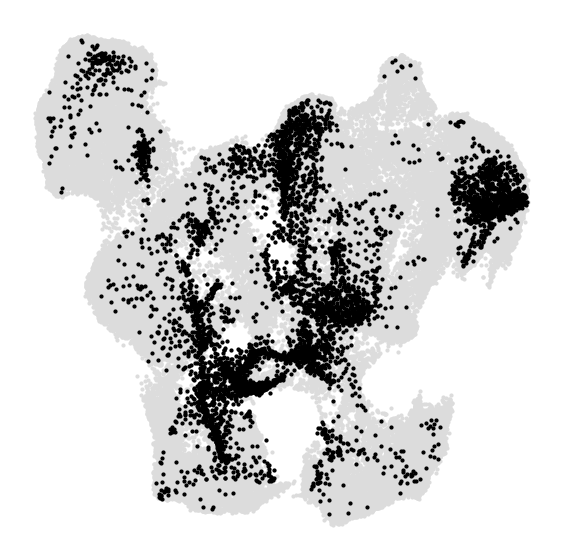

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib.patheffects as PathEffects
import seaborn as sns

texts = []
colors = pd.read_csv("/home/jjanssens/jjans/resources/colour_list.tsv",sep="\t",index_col=0)
font0 = FontProperties()
font0.set_family('sans-serif')
font0.set_size('20')
font0.set_weight('bold')
font0.set_stretch("extra-condensed")

for resolution in ['experiment']:
    plt.figure(figsize=(7,7))
    i=0
    x,y= 'umap_1','umap_2'
    plt.plot(meta[x],meta[y],'o',c='gainsboro',markersize=2)
    meta_AP_ctrl = meta
    clusters = set(meta_AP_ctrl[resolution])
    cluster_col = 0

    clusters = [x for x in clusters if x!='screen']
    for cluster in clusters:
        plotting_meta = meta_AP_ctrl.loc[meta_AP_ctrl[resolution]==cluster,]
        if cluster in colors.index:
            plt.plot(plotting_meta[x],plotting_meta[y],'o',c='k',markersize=2,label=cluster)
        else:
            colors.loc[cluster,'Colour'] = 'k'
            plt.plot(plotting_meta[x],plotting_meta[y],'o',c='k',markersize=2,label=cluster)
            cluster_col+=1
        
        i+=1

    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(resolution+' '+str(len(clusters)),fontsize=15)
    sns.despine(top=True,bottom=True,right=True,left=True)
    plt.xticks([])
    plt.yticks([])
    plt.title('')
#    plt.legend(markerscale=2)
    plt.savefig("figures/seurat_integration_"+resolution+"_UMAP_experiment.png",dpi=350,bbox_inches='tight',pad_inches=0)
    plt.show()
    plt.close()


In [14]:
adata.obs = meta.loc[adata.obs.index]

In [15]:
meta1 = adata.obs.copy()

In [16]:
meta_oe1 = meta1.loc[meta1['experiment']=='oe']

In [17]:
meta_oe2.loc[meta_oe1.index,'combined_label'].value_counts()

label_TLX2       2252
unknown          1380
label_MSX1        688
label_TCF7L2      455
label_TCF7L1      412
label_NEUROD1     343
label_LHX9        287
label_EGFP        247
label_LEF1        189
label_NFATC1      156
label_PHOX2B       62
label_ZFHX3        27
label_LHX4         14
label_HOXB3         5
label_SMAD9         3
label_RXRG          2
Name: combined_label, dtype: int64

In [18]:
meta_oe1['final_label'].value_counts()

unknown          4218
label_TLX2        631
label_MSX1        358
label_EGFP        247
label_TCF7L1      218
label_TCF7L2      194
label_NEUROD1     163
label_NFATC1      155
label_LHX9        130
label_LEF1        107
label_PHOX2B       50
label_ZFHX3        27
label_LHX4         14
label_HOXB3         5
label_SMAD9         3
label_RXRG          2
label_MEIS2         0
label_RARB          0
Name: final_label, dtype: int64

In [19]:
adata

AnnData object with n_obs × n_vars = 96179 × 4194
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'percent_mito', 'n_counts', 'outlier', 'mt_outlier', 'doublet_score', 'predicted_doublet', 'M_XAV', 'M_CHIR', 'M_RA', 'M_FGF8', 'M_BMP4', 'M_SHH', 'M_CycA', 'FB_NFATC1', 'FB_LEF1', 'FB_LHX4', 'FB_NEUROD1', 'FB_PHOX2B', 'FB_LHX9', 'FB_MSX1', 'FB_ZFHX3', 'FB_TLX2', 'FB_TCF7L2', 'FB_TCF7L1', 'FB_EGFP', 'FB_SMAD9', 'FB_RXRG', 'FB_RARB', 'FB_NFIA', 'FB_MEIS2', 'FB_HOXB3', 'TF_NFATC1', 'TF_LEF1', 'TF_LHX4', 'TF_NEUROD1', 'TF_PHOX2B', 'TF_LHX9', 'TF_MSX1', 'TF_ZFHX3', 'TF_TLX2', 'TF_TCF7L2', 'TF_TCF7L1', 'TF_EGFP', 'TF_SMAD9', 'TF_RXRG', 'TF_RARB', 'TF_NFIA', 'TF_MEIS2', 'TF_HOXB3', 'pred_label', 'final_label', 'experiment', 'perce

In [20]:
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=50,use_rep='X_integrated.dr',key_added='scanpy_nbors')

In [21]:
adata

AnnData object with n_obs × n_vars = 96179 × 4194
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'percent_mito', 'n_counts', 'outlier', 'mt_outlier', 'doublet_score', 'predicted_doublet', 'M_XAV', 'M_CHIR', 'M_RA', 'M_FGF8', 'M_BMP4', 'M_SHH', 'M_CycA', 'FB_NFATC1', 'FB_LEF1', 'FB_LHX4', 'FB_NEUROD1', 'FB_PHOX2B', 'FB_LHX9', 'FB_MSX1', 'FB_ZFHX3', 'FB_TLX2', 'FB_TCF7L2', 'FB_TCF7L1', 'FB_EGFP', 'FB_SMAD9', 'FB_RXRG', 'FB_RARB', 'FB_NFIA', 'FB_MEIS2', 'FB_HOXB3', 'TF_NFATC1', 'TF_LEF1', 'TF_LHX4', 'TF_NEUROD1', 'TF_PHOX2B', 'TF_LHX9', 'TF_MSX1', 'TF_ZFHX3', 'TF_TLX2', 'TF_TCF7L2', 'TF_TCF7L1', 'TF_EGFP', 'TF_SMAD9', 'TF_RXRG', 'TF_RARB', 'TF_NFIA', 'TF_MEIS2', 'TF_HOXB3', 'pred_label', 'final_label', 'experiment', 'perce

In [22]:
adata.obsm['X_umap_seurat'] = adata.obsm['X_umap'].copy()

In [23]:
sc.tl.umap(adata,neighbors_key='scanpy_nbors')

/links/groups/treutlein/USERS/jjans/anaconda3/envs/py_jjans_3.10_scanpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


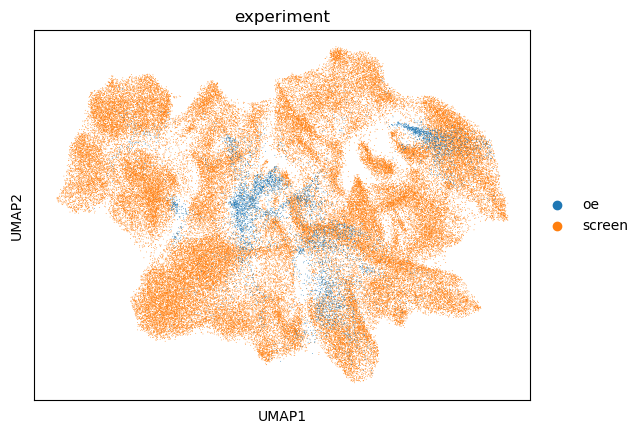

In [24]:
sc.pl.umap(adata,color='experiment')

In [25]:
df_distances_Seur = pd.DataFrame.sparse.from_spmatrix(adata.obsp['distances'])
df_distances_Seur.index = adata.obs_names
df_distances_Seur.columns = adata.obs_names

df_distances_Scan = pd.DataFrame.sparse.from_spmatrix(adata.obsp['scanpy_nbors_distances'])
df_distances_Scan.index = adata.obs_names
df_distances_Scan.columns = adata.obs_names

In [26]:
df_distances_Scan['43_96_51__s3'].sort_values(ascending=False).head(n=30)

67_88_54__s3          50.680584
66_18_73__s3          39.793201
67_58_46__s1          38.910061
60_15_05__s3-1        38.669998
79_02_86__s1          38.650242
57_39_31__s1          35.469013
ATTCGTTTCTTCACAT-2    34.182716
67_24_45__s3          34.141998
41_62_39__s2          33.510132
66_34_13__s2          32.272964
82_23_03__s1          31.052736
66_38_05__s2          31.011456
54_61_68__s1          30.454699
67_60_20__s1          30.227545
56_16_65__s3          30.162098
67_75_58__s2          29.579025
55_33_65__s3          29.114752
44_58_26__s3          28.344820
GAGTCATTCCTCTCGA-2    27.893759
78_93_95__s1          27.664492
GTTGAACCACTACGGC-2    27.436407
AGGTTACTCTACTATC-2    27.325357
44_41_51__s3          25.803270
55_58_76__s3          25.747244
67_81_42__s2          24.791548
GACTATGCACAGAGAC-2    23.557480
66_04_46__s2          23.529009
66_66_44__s3          23.105446
82_36_95__s2           0.000000
44_48_75__s2           0.000000
Name: 43_96_51__s3, dtype: Sparse[float6

In [27]:
df_distances_Seur['43_96_51__s3'].sort_values(ascending=False)

43_96_51__s3          1.000000
44_58_26__s3          0.290323
67_81_42__s2          0.290323
GTTGAACCACTACGGC-2    0.250000
78_93_95__s1          0.250000
                        ...   
44_57_09__s1          0.000000
53_80_08__s3          0.000000
13_85_78__s3          0.000000
23_15_84__s2          0.000000
TTTGTTGGTCTGCATA-2    0.000000
Name: 43_96_51__s3, Length: 96179, dtype: Sparse[float64, 0]

In [28]:
#Seurats distance matrix is a correlation matrix (1 == equal, 0 most different)

In [29]:
screen_cells = list(adata.obs.loc[adata.obs['experiment']=='screen'].index)
oe_cells = list(adata.obs.loc[adata.obs['experiment']=='oe'].index)

In [30]:
A1 = df_distances_Seur.loc[screen_cells,oe_cells]

In [31]:
sample = 'iGlut_post'
print(sample)

reference_adata = sc.read_h5ad("/home/jjanssens/jjans/analysis/iNeuron_morphogens/final/scanpy/"+sample+"_dr_clustered_raw_merged.h5ad")
#load metadata
ref_meta = pd.read_csv("/home/jjanssens/jjans/analysis/iNeuron_morphogens/final/scanpy/"+sample+"_dr_clustered_raw_merged_meta.tsv",sep="\t",index_col=0)
ref_meta['M_CycA'] = ref_meta['CycA']


iGlut_post


In [32]:
reference_adata.obs = ref_meta.loc[reference_adata.obs.index]

In [33]:
#reference_adata = adata[adata.obs['experiment']=='screen']

In [34]:
ref_umap_df = pd.DataFrame(reference_adata.obsm['X_umap'],index=reference_adata.obs_names)

In [35]:
B1 = ref_umap_df.loc[screen_cells]

In [36]:
A1_norm = A1/A1.sum()

In [37]:
A1_norm.shape

(89657, 6522)

In [38]:
B1.shape

(89657, 2)

In [39]:
C1 = A1_norm.T.dot(B1)

In [40]:
C1.shape

(6522, 2)

In [121]:
B1.to_csv("seurat_withscreen/projected_umap_oe_cells_background.tsv",sep="\t")

In [120]:
C1.to_csv("seurat_withscreen/projected_umap_oe_cells.tsv",sep="\t")

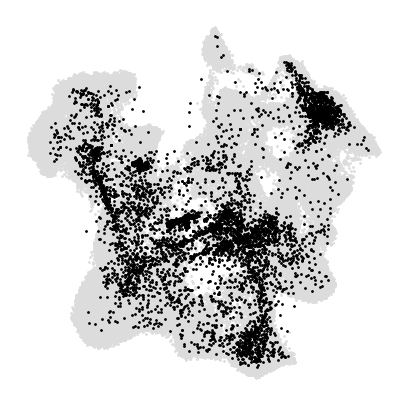

In [41]:
plt.figure(figsize=(5,5))
plt.scatter(x=B1[0],y=B1[1],s=1,c='gainsboro')
plt.scatter(x=C1[0],y=C1[1],s=1,c='k')
sns.despine(left=True,bottom=True)
plt.xticks([])
plt.yticks([])
plt.savefig("figures/seurat_integration_"+resolution+"_UMAP_experiment_projected.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()


In [42]:
oe_adata = adata[oe_cells,:].copy()

In [43]:
C1 = C1.fillna(0)

In [44]:
oe_adata.obsm['X_umap'] = C1.values

In [45]:
oe_adata

AnnData object with n_obs × n_vars = 6522 × 4194
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'percent_mito', 'n_counts', 'outlier', 'mt_outlier', 'doublet_score', 'predicted_doublet', 'M_XAV', 'M_CHIR', 'M_RA', 'M_FGF8', 'M_BMP4', 'M_SHH', 'M_CycA', 'FB_NFATC1', 'FB_LEF1', 'FB_LHX4', 'FB_NEUROD1', 'FB_PHOX2B', 'FB_LHX9', 'FB_MSX1', 'FB_ZFHX3', 'FB_TLX2', 'FB_TCF7L2', 'FB_TCF7L1', 'FB_EGFP', 'FB_SMAD9', 'FB_RXRG', 'FB_RARB', 'FB_NFIA', 'FB_MEIS2', 'FB_HOXB3', 'TF_NFATC1', 'TF_LEF1', 'TF_LHX4', 'TF_NEUROD1', 'TF_PHOX2B', 'TF_LHX9', 'TF_MSX1', 'TF_ZFHX3', 'TF_TLX2', 'TF_TCF7L2', 'TF_TCF7L1', 'TF_EGFP', 'TF_SMAD9', 'TF_RXRG', 'TF_RARB', 'TF_NFIA', 'TF_MEIS2', 'TF_HOXB3', 'pred_label', 'final_label', 'experiment', 'percen

In [46]:
reference_adata.obs['experiment'] = 'screen'
reference_adata.obs['pred_label'] = 'screen'
reference_adata.obs['final_label'] = 'screen'


In [47]:
combined_adata = sc.concat([oe_adata,reference_adata])

/links/groups/treutlein/USERS/jjans/anaconda3/envs/py_jjans_3.10_scanpy/lib/python3.10/site-packages/anndata/_core/merge.py:1356: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(


In [48]:
combined_adata.obs['final_label'].value_counts()

screen           184431
unknown            4218
label_TLX2          631
label_MSX1          358
label_EGFP          247
label_TCF7L1        218
label_TCF7L2        194
label_NEUROD1       163
label_NFATC1        155
label_LHX9          130
label_LEF1          107
label_PHOX2B         50
label_ZFHX3          27
label_LHX4           14
label_HOXB3           5
label_SMAD9           3
label_RXRG            2
Name: final_label, dtype: int64

In [49]:
labels_use = ['TLX2','MSX1','TCF7L1','TCF7L2','NEUROD1','NFATC1','LHX9','LEF1','PHOX2B','EGFP','ZFHX3','SMAD9']
labels_use = ['TLX2','MSX1','TCF7L1','TCF7L2','NEUROD1','NFATC1','LHX9','LEF1','PHOX2B','EGFP']

labels_use = ['label_'+x for x in labels_use]
labels_use = labels_use + ['screen']
combined_adata_subset = combined_adata[combined_adata.obs['final_label'].isin(labels_use)]

In [50]:
sc.tl.embedding_density(combined_adata_subset, basis='umap', groupby='final_label')

/links/groups/treutlein/USERS/jjans/anaconda3/envs/py_jjans_3.10_scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/links/groups/treutlein/USERS/jjans/anaconda3/envs/py_jjans_3.10_scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/links/groups/treutlein/USERS/jjans/anaconda3/envs/py_jjans_3.10_scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/links/groups/treutlein/USERS/jjans/anaconda3/envs/py_jjans_3.10_scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


In [51]:
sc.set_figure_params(dpi=200)

In [52]:
combined_adata_subset.obsm

AxisArrays with keys: X_pca, X_umap

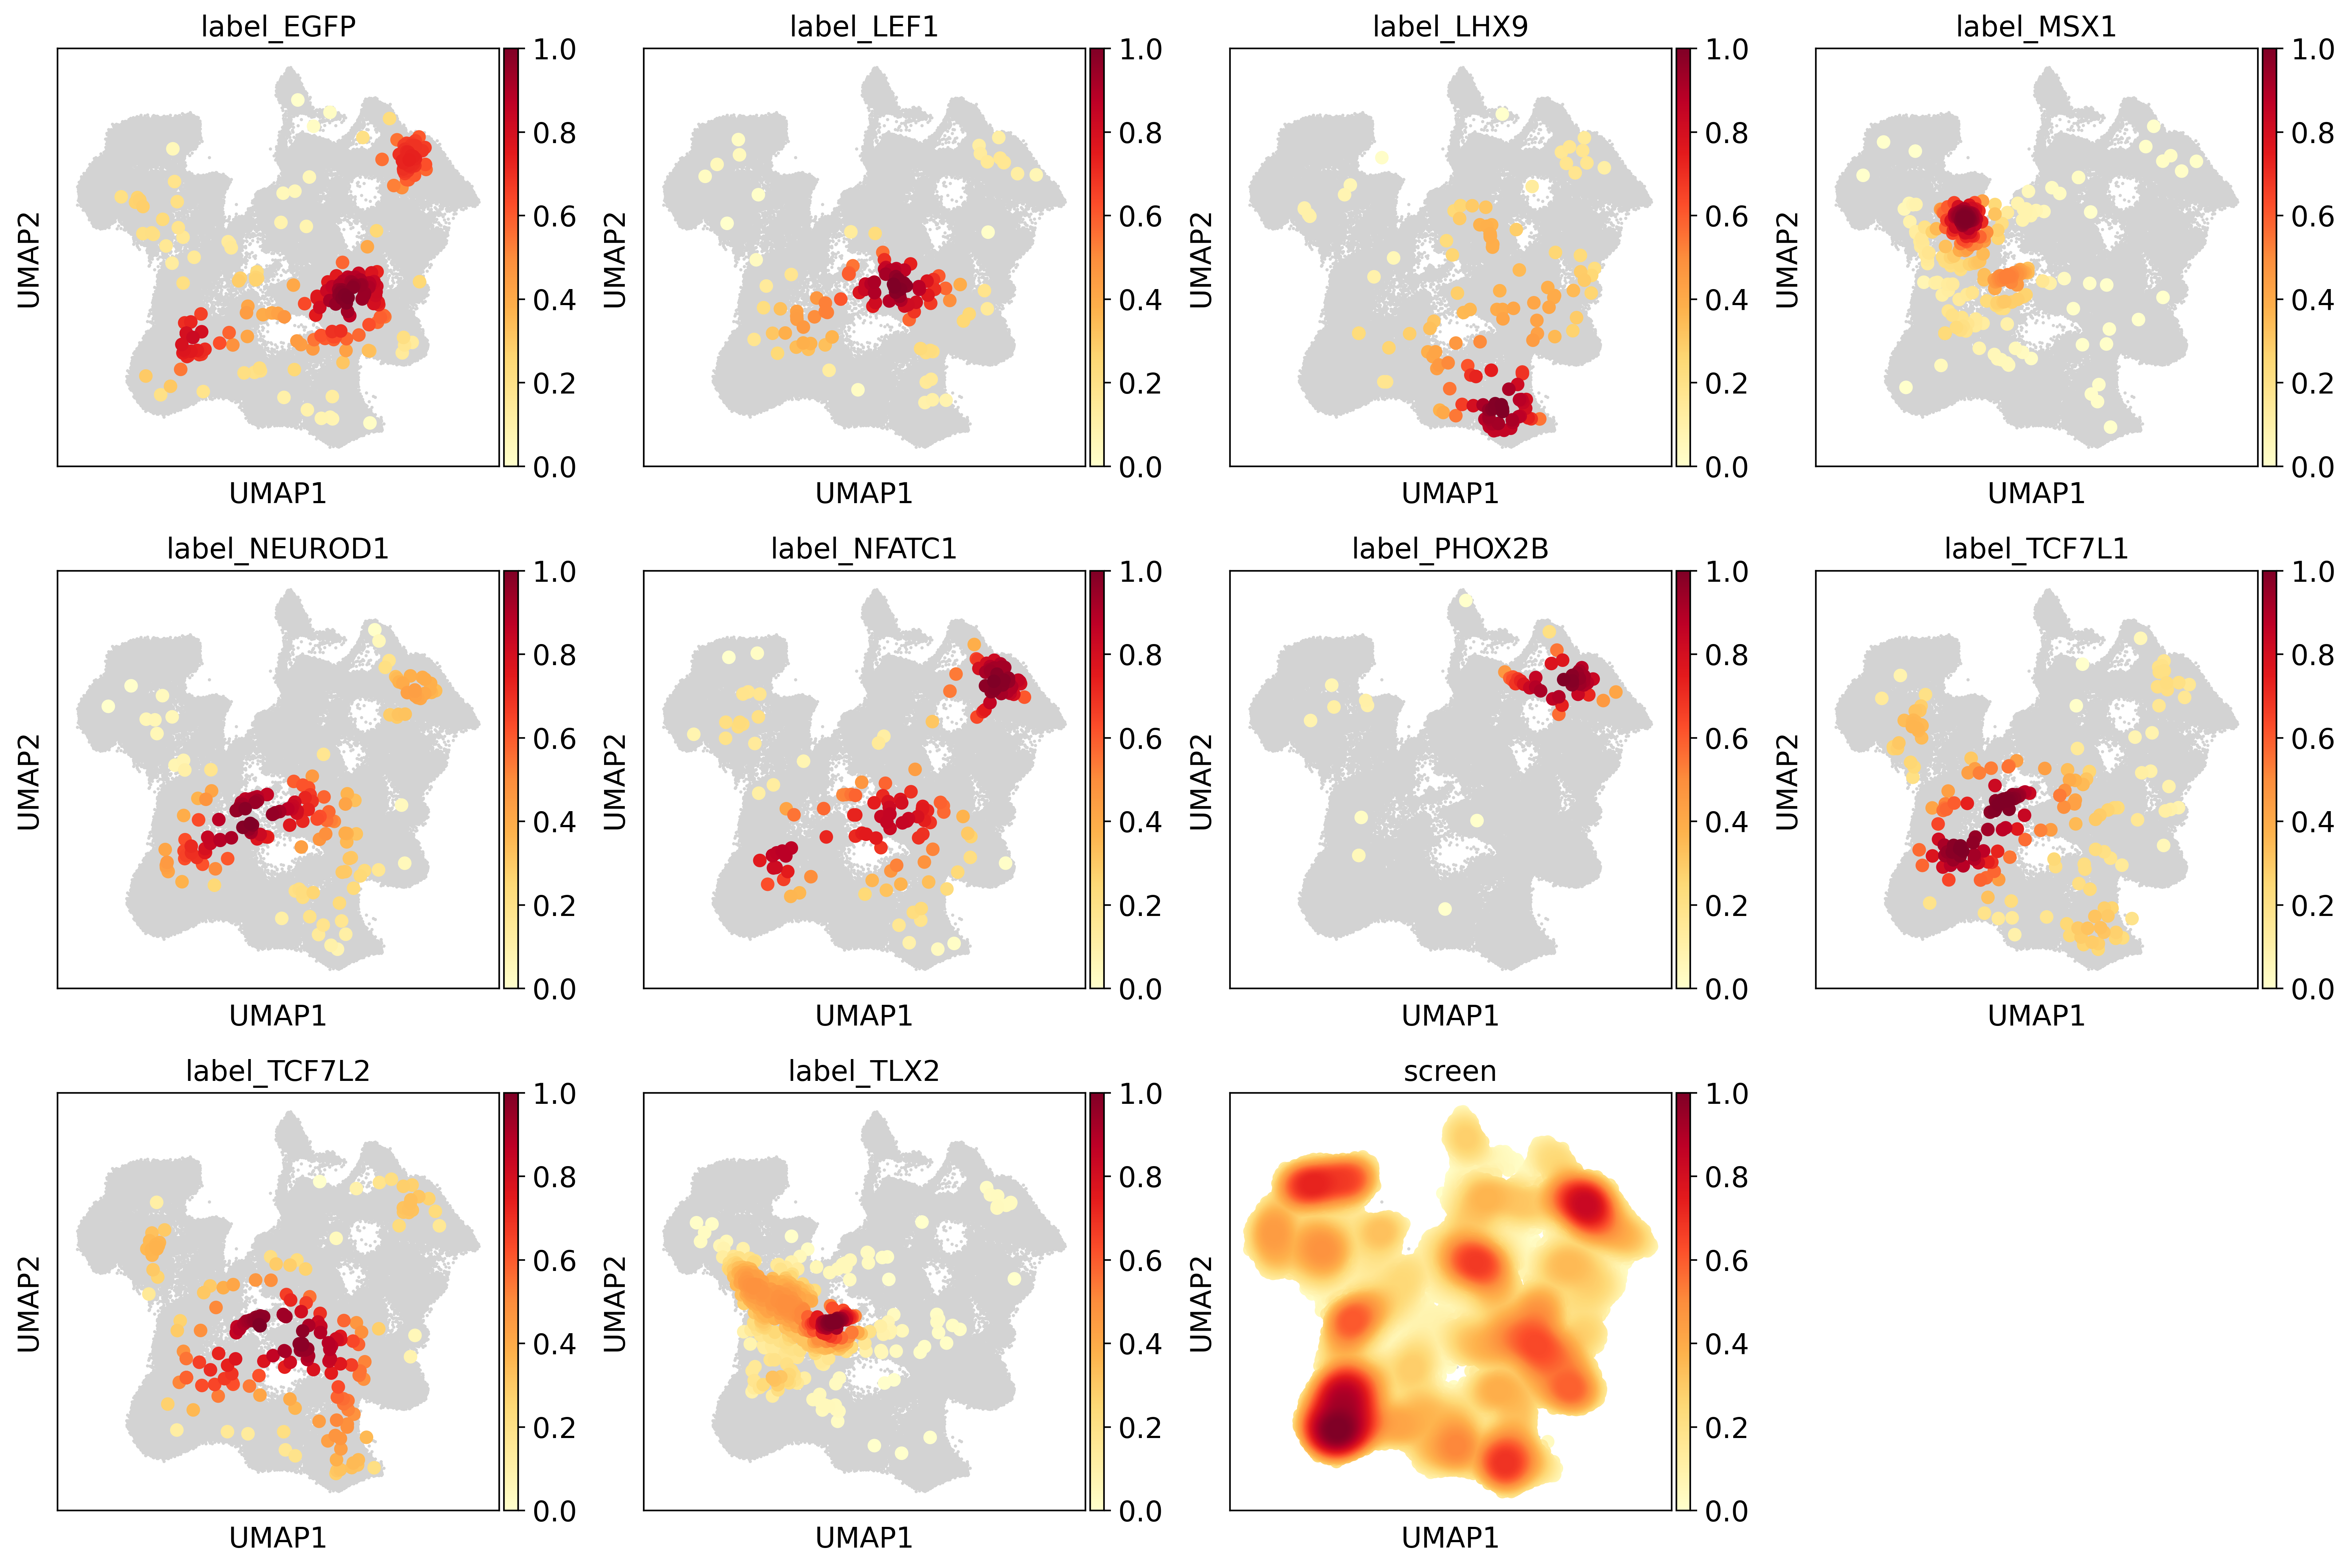

In [53]:
sc.pl.embedding_density(
    combined_adata_subset, basis='umap', key='umap_density_final_label',bg_dotsize=10
)


In [66]:
combined_adata_subset_umap = pd.DataFrame(combined_adata_subset.obsm['X_umap'],index=combined_adata_subset.obs_names,columns=['proj_umap1','proj_umap2'])

In [67]:
meta_dens = combined_adata_subset.obs.copy()
meta_dens = pd.merge(meta_dens,combined_adata_subset_umap,left_index=True,right_index=True)

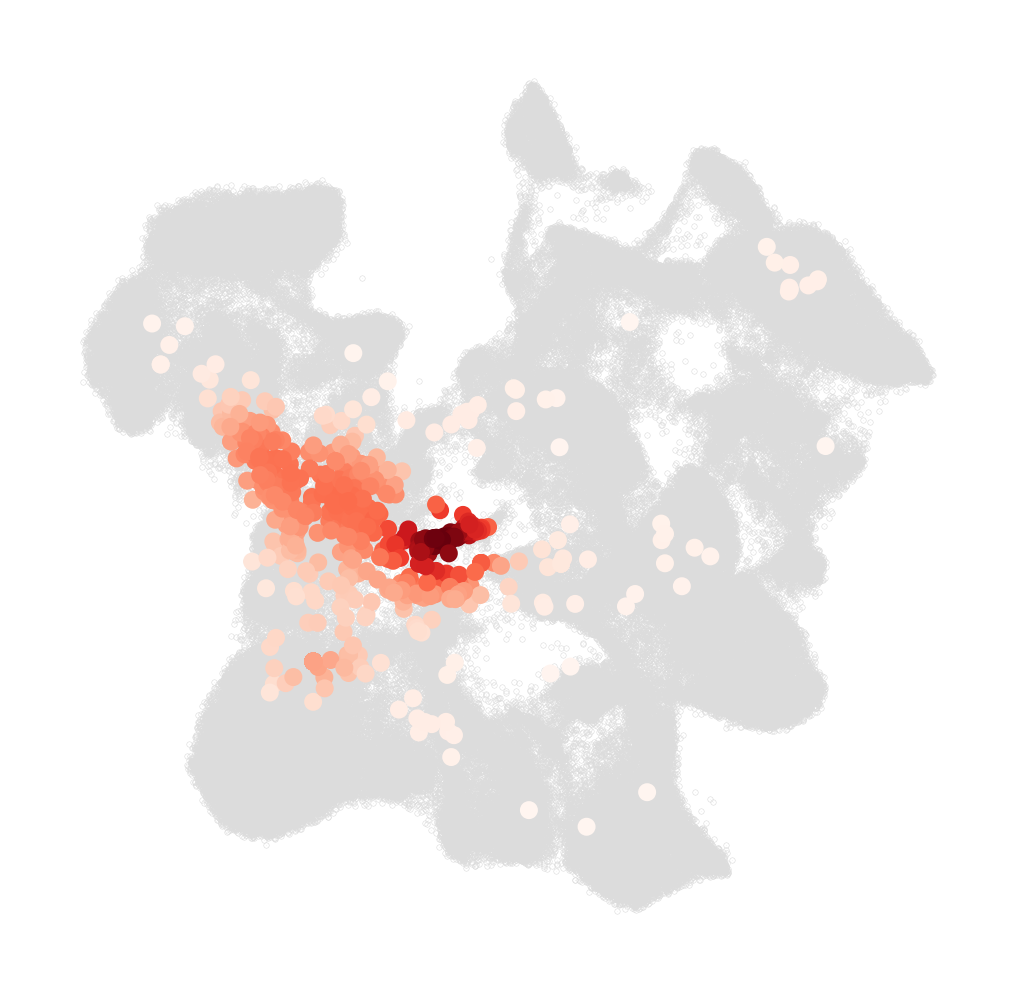

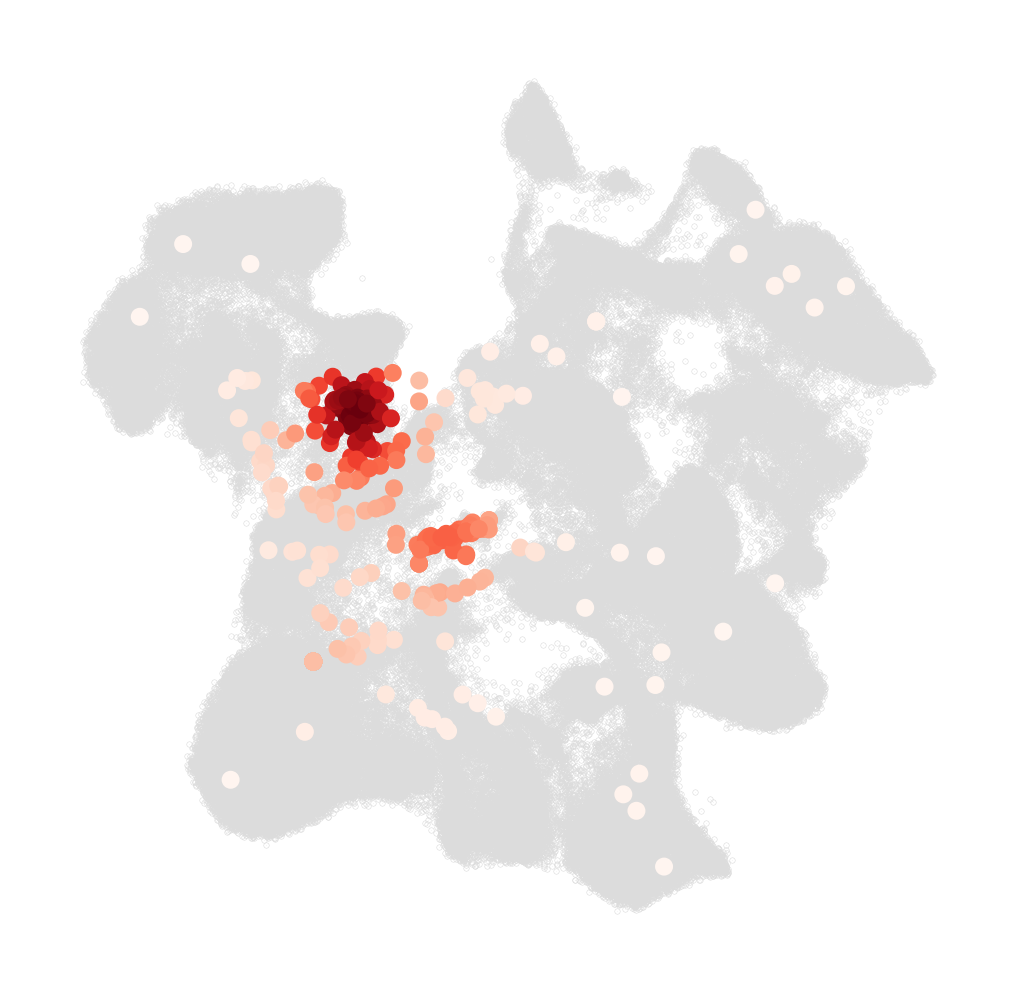

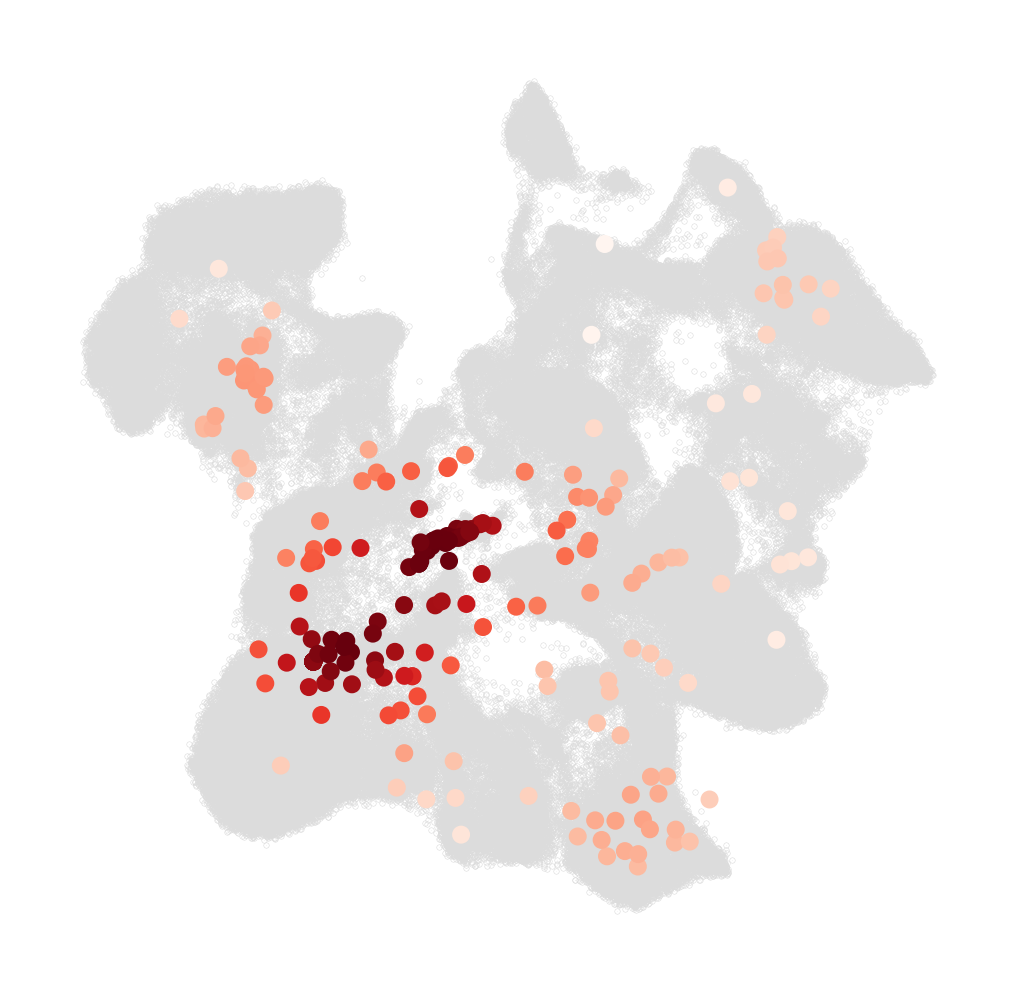

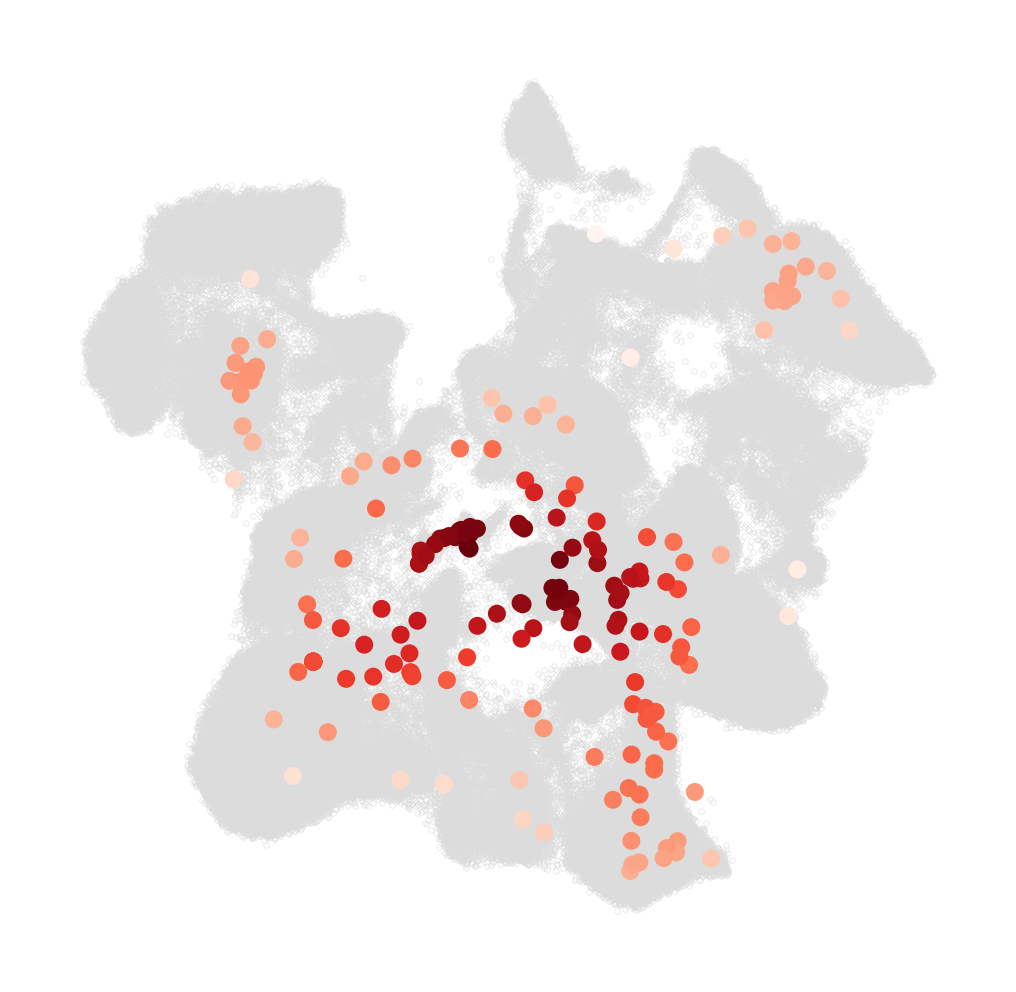

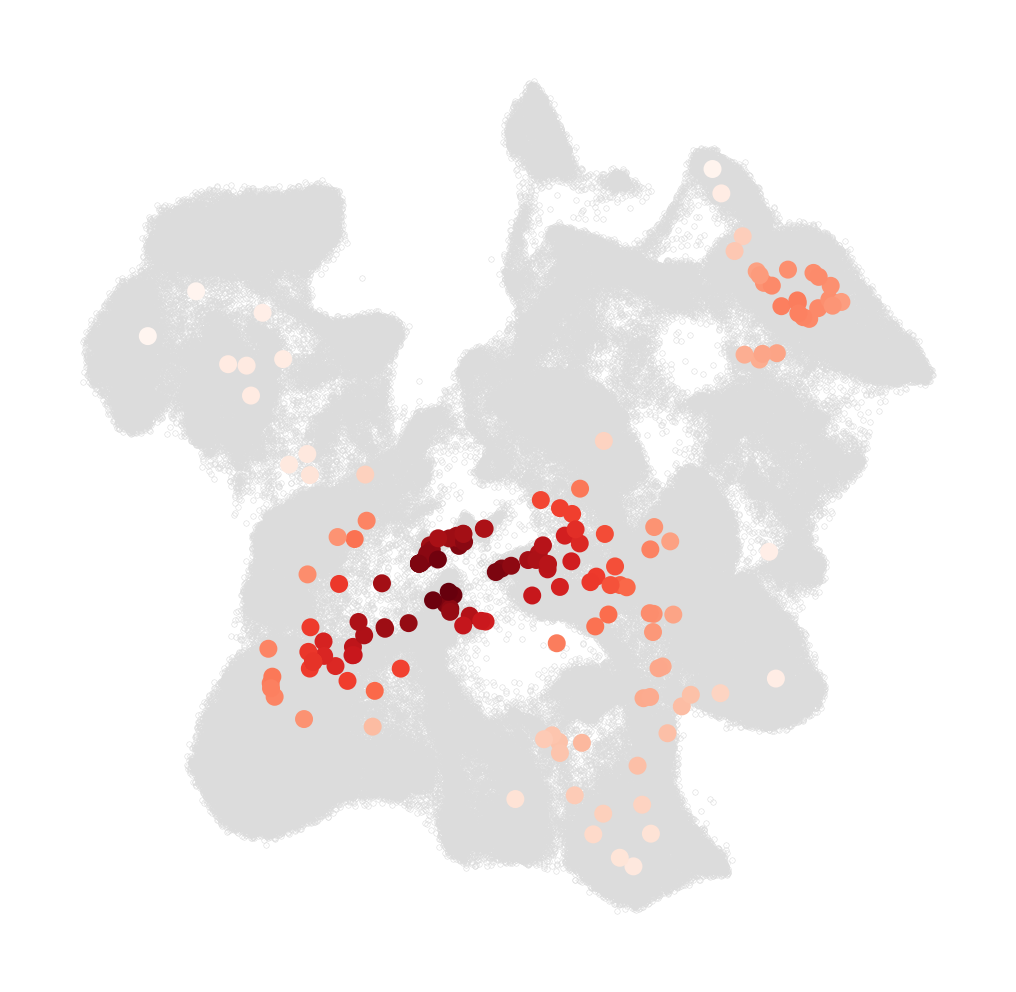

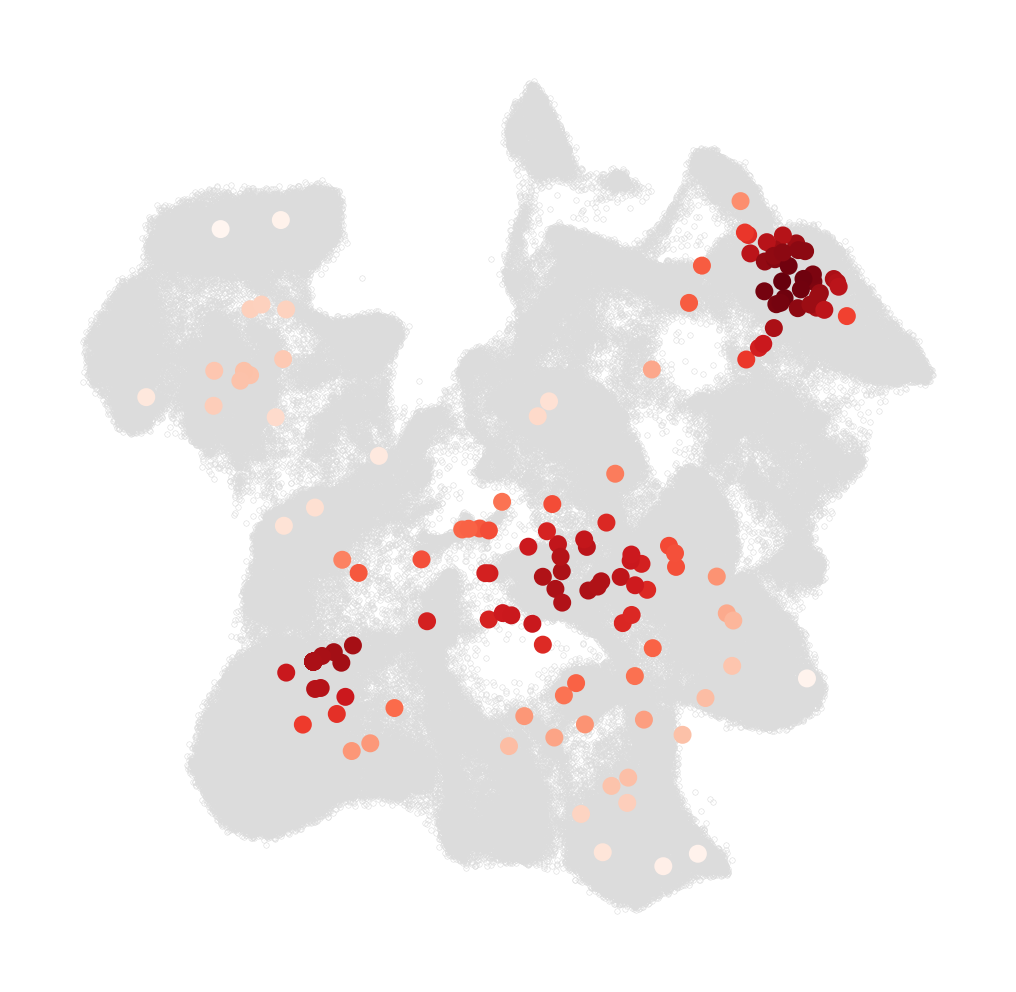

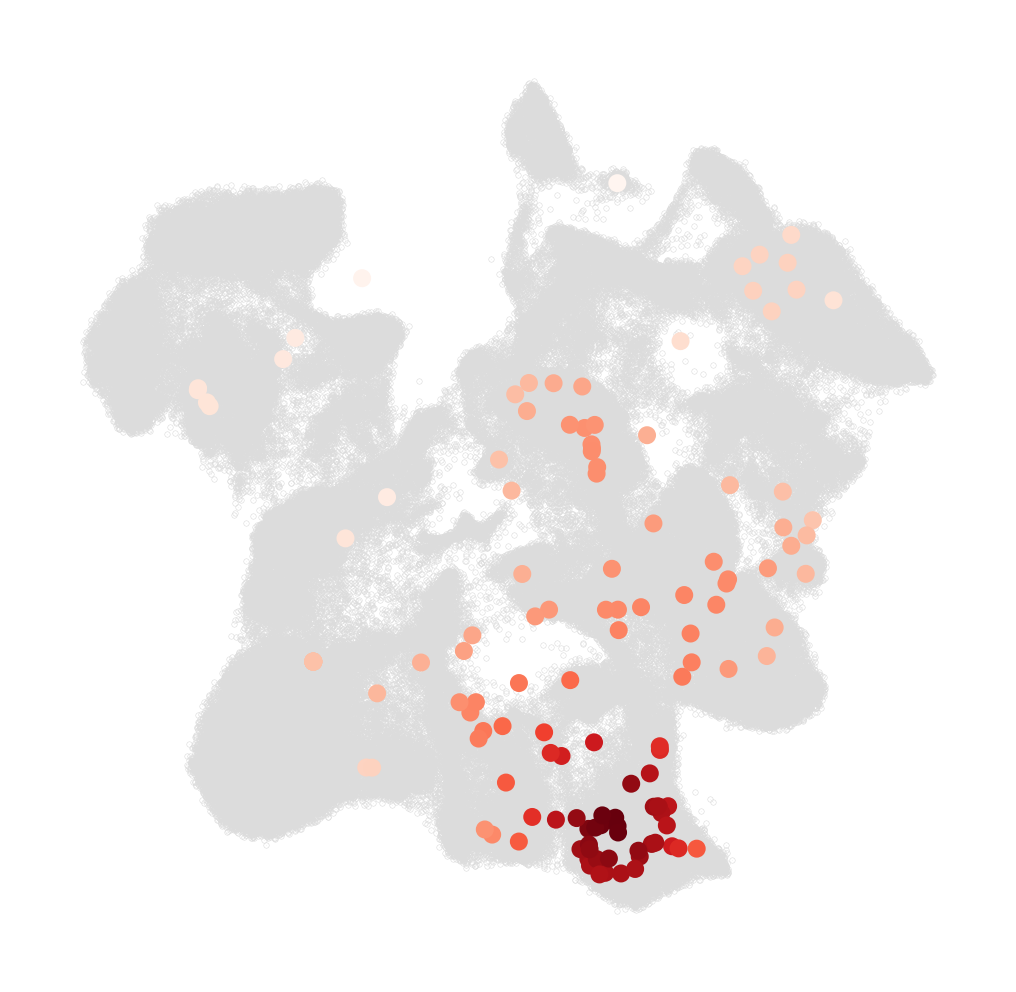

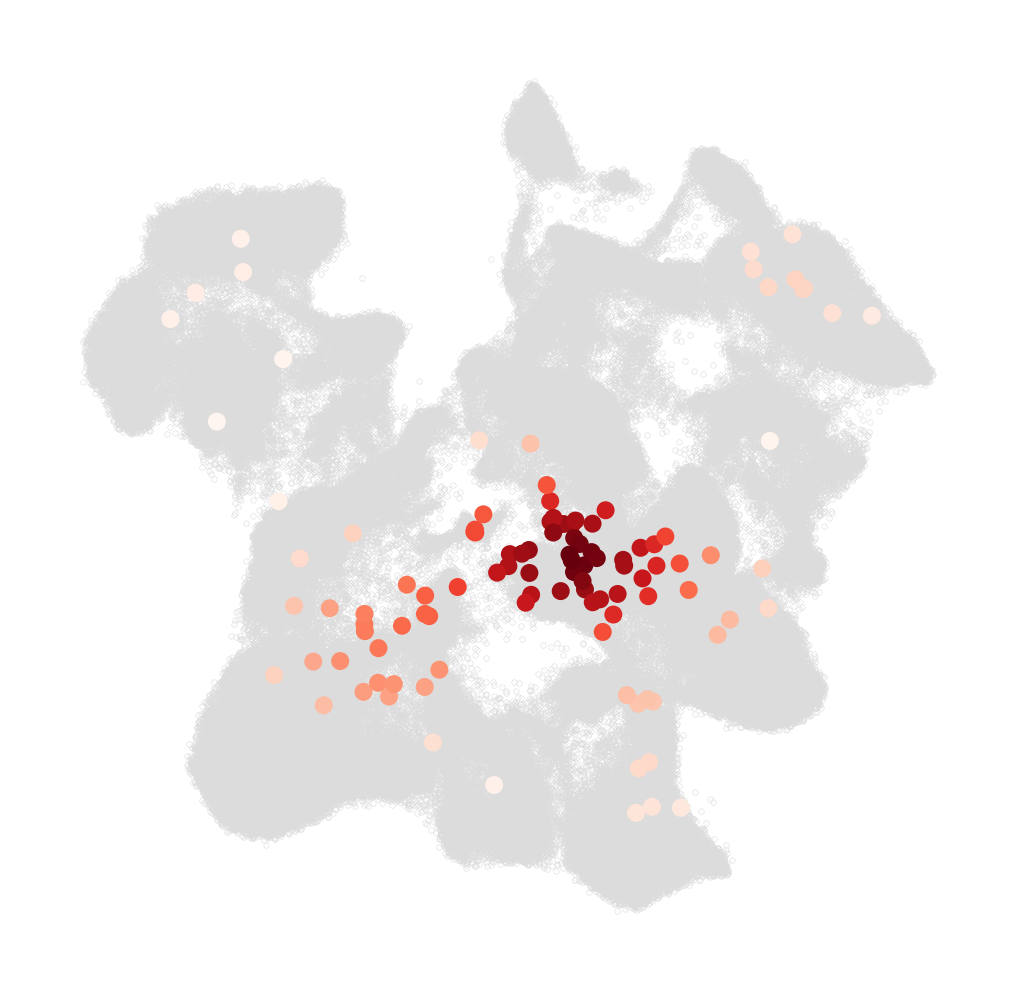

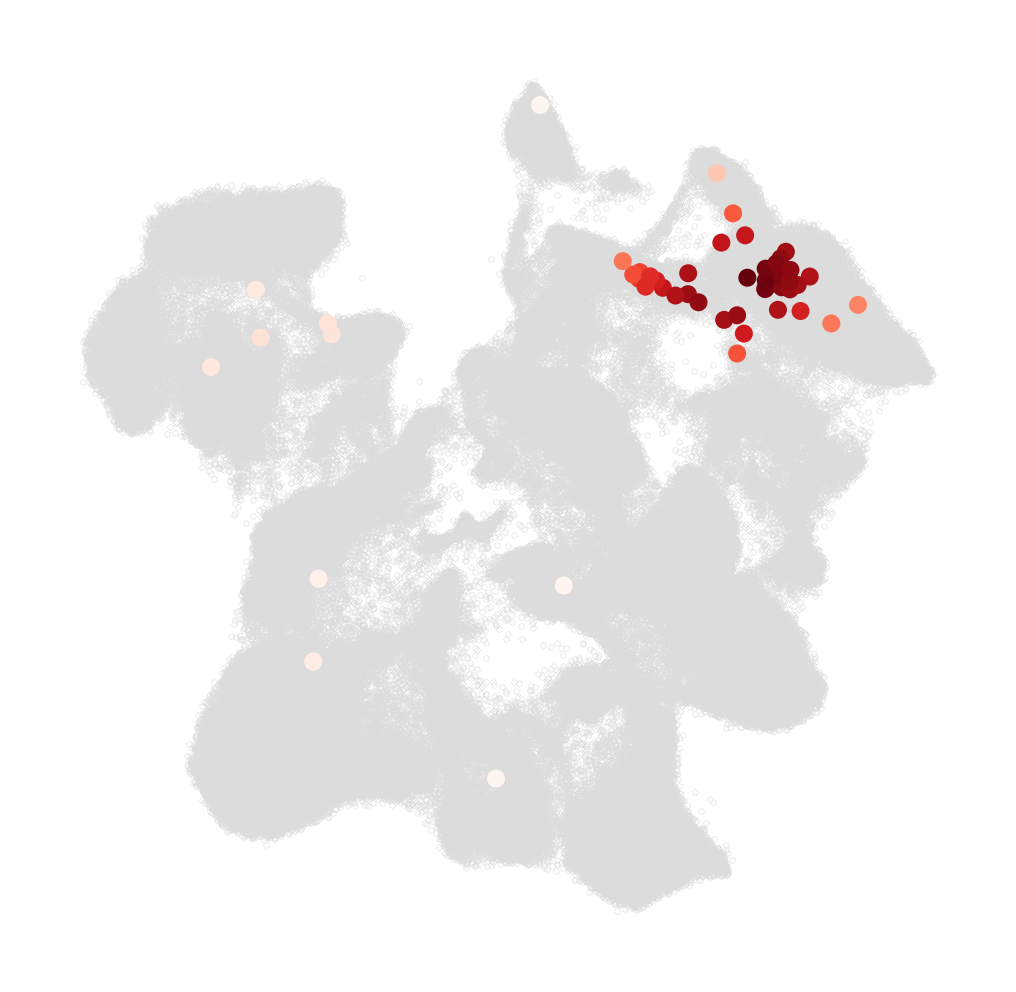

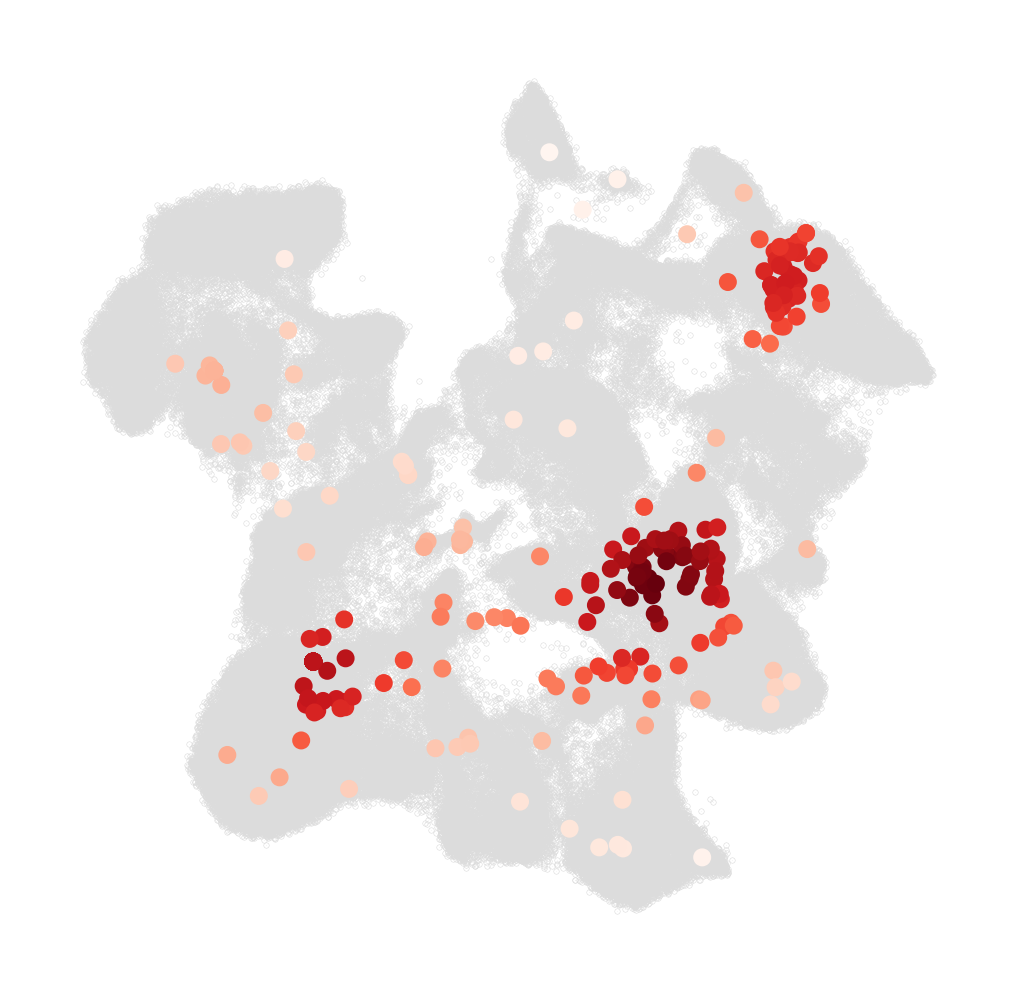

In [118]:
for label in ['TLX2','MSX1','TCF7L1','TCF7L2','NEUROD1','NFATC1','LHX9','LEF1','PHOX2B','EGFP']:

    meta_dens_label = meta_dens[meta_dens['final_label']=='label_'+label]
    
    plt.figure(figsize=(3,3))
    plt.scatter(meta_dens['proj_umap1'],meta_dens['proj_umap2'],s=0.01,c='gainsboro')
    plt.scatter(meta_dens_label['proj_umap1'],meta_dens_label['proj_umap2'],s=5,c=meta_dens_label['umap_density_final_label'],cmap='Reds',vmin=0,vmax=1)
    plt.xticks([])
    plt.yticks([])
    sns.despine(left=True,bottom=True)
    plt.savefig("figures/seurat_integration_final_label_"+label+"_density_bg0.01.png",dpi=350,bbox_inches='tight',pad_inches=0)
    plt.show()
    plt.close()

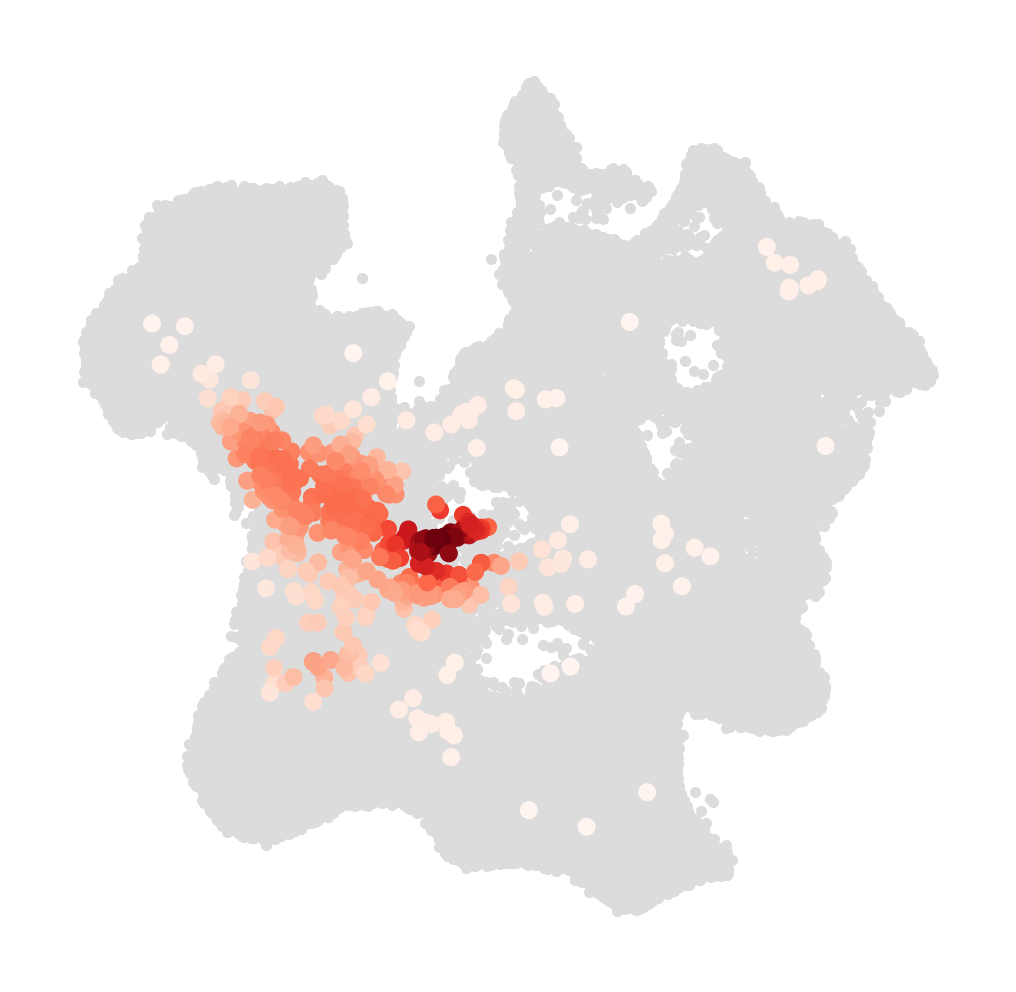

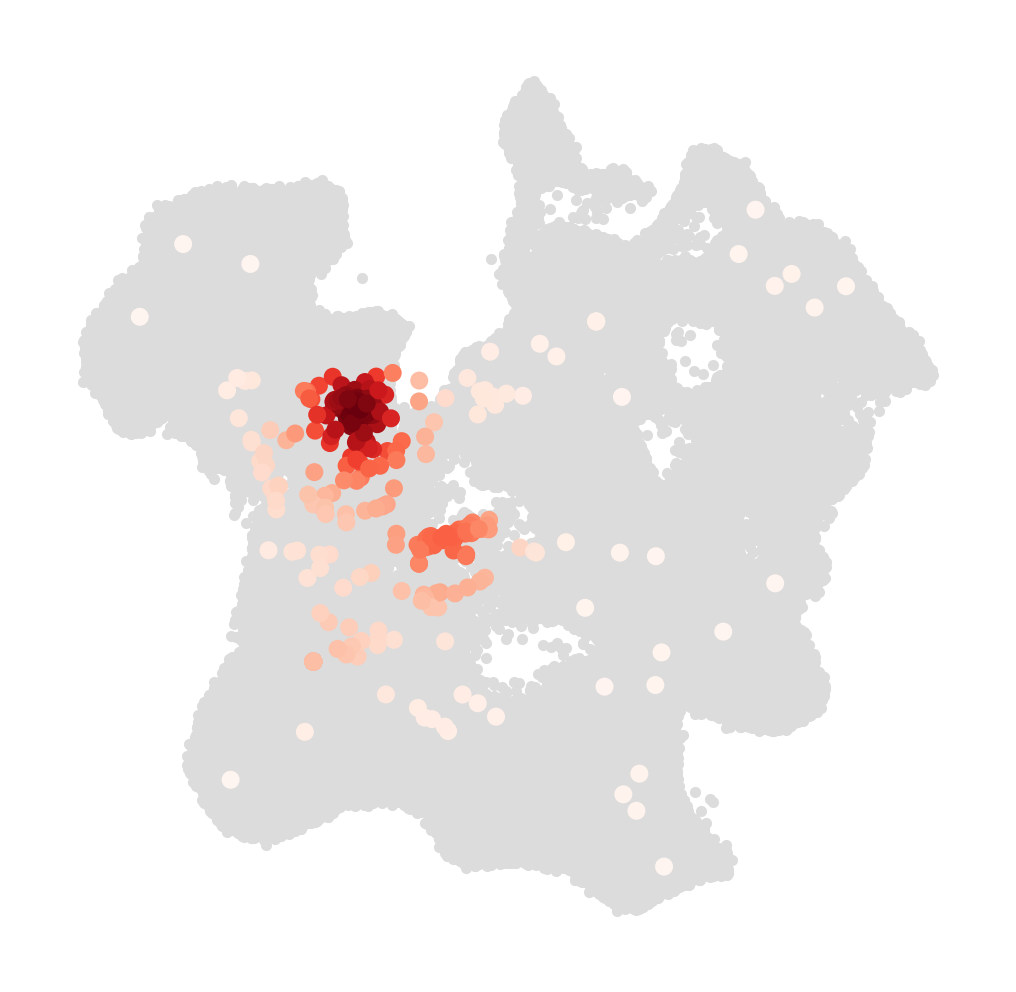

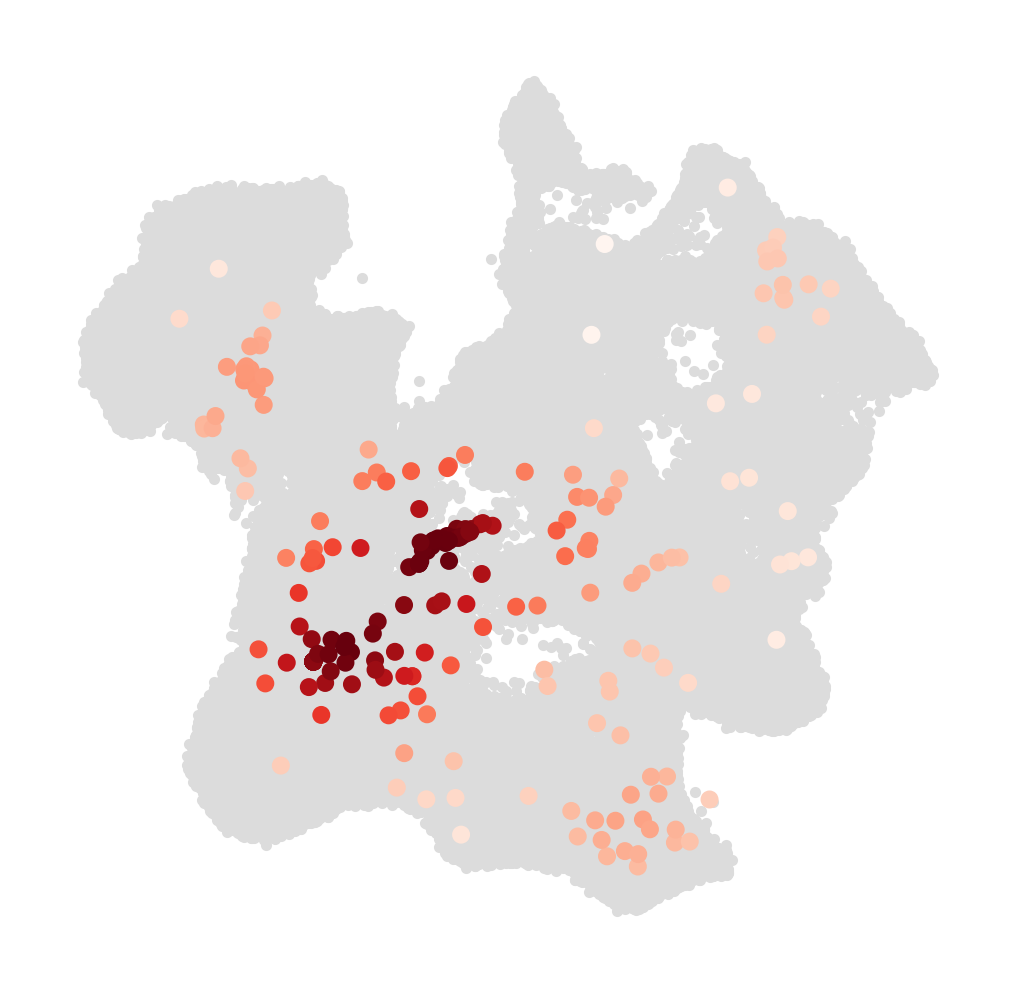

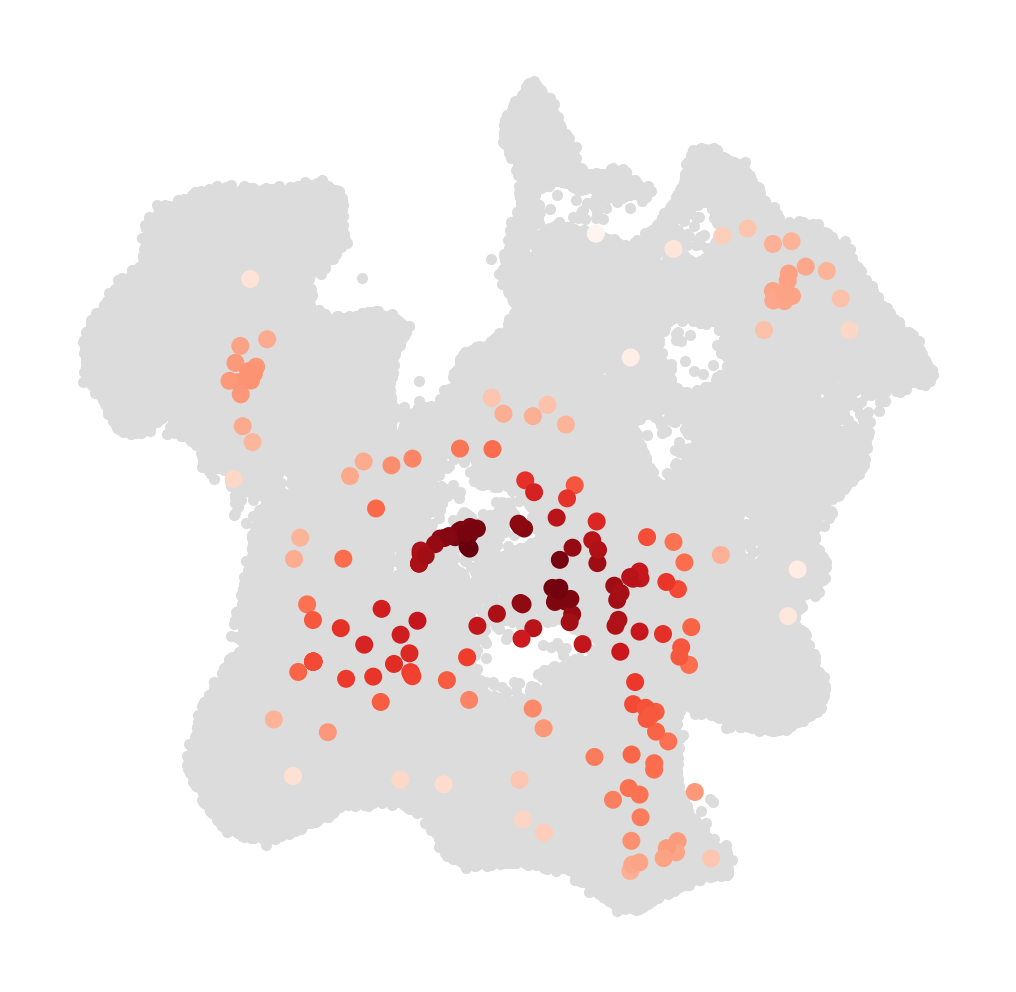

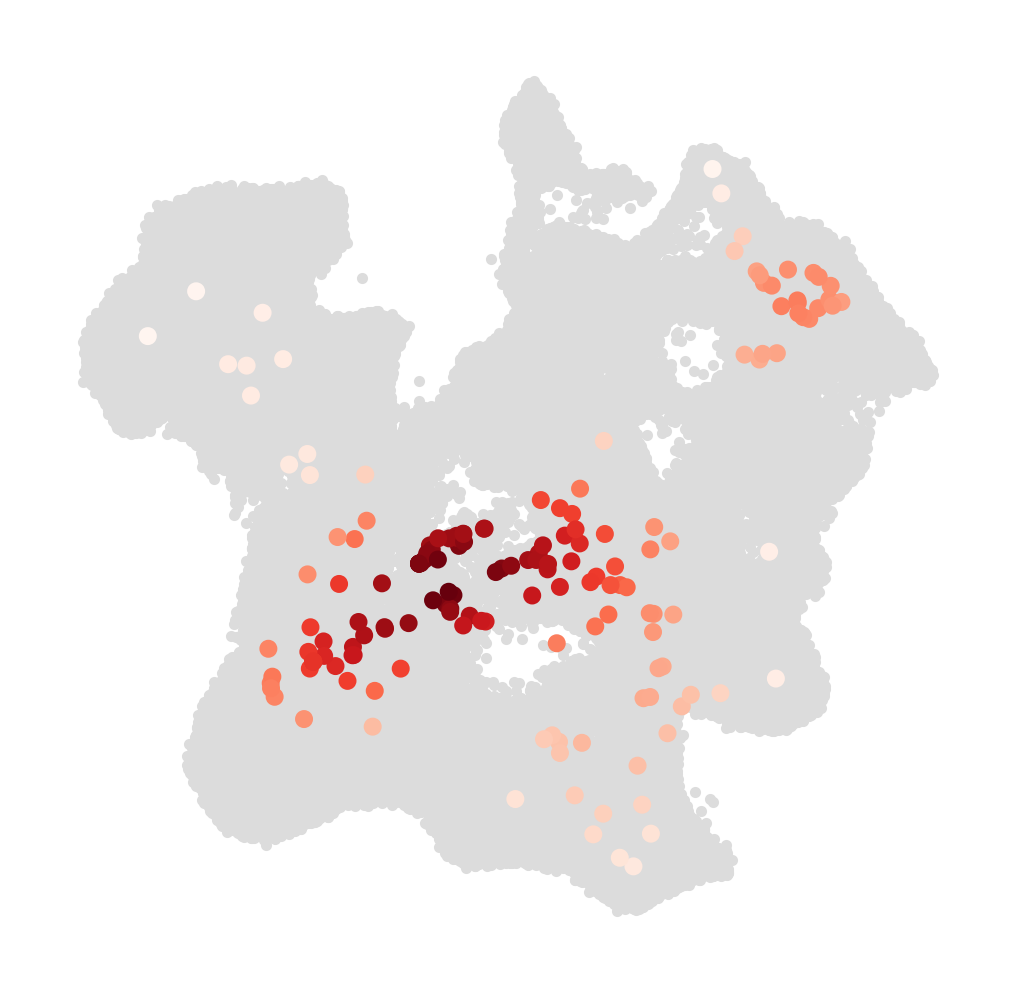

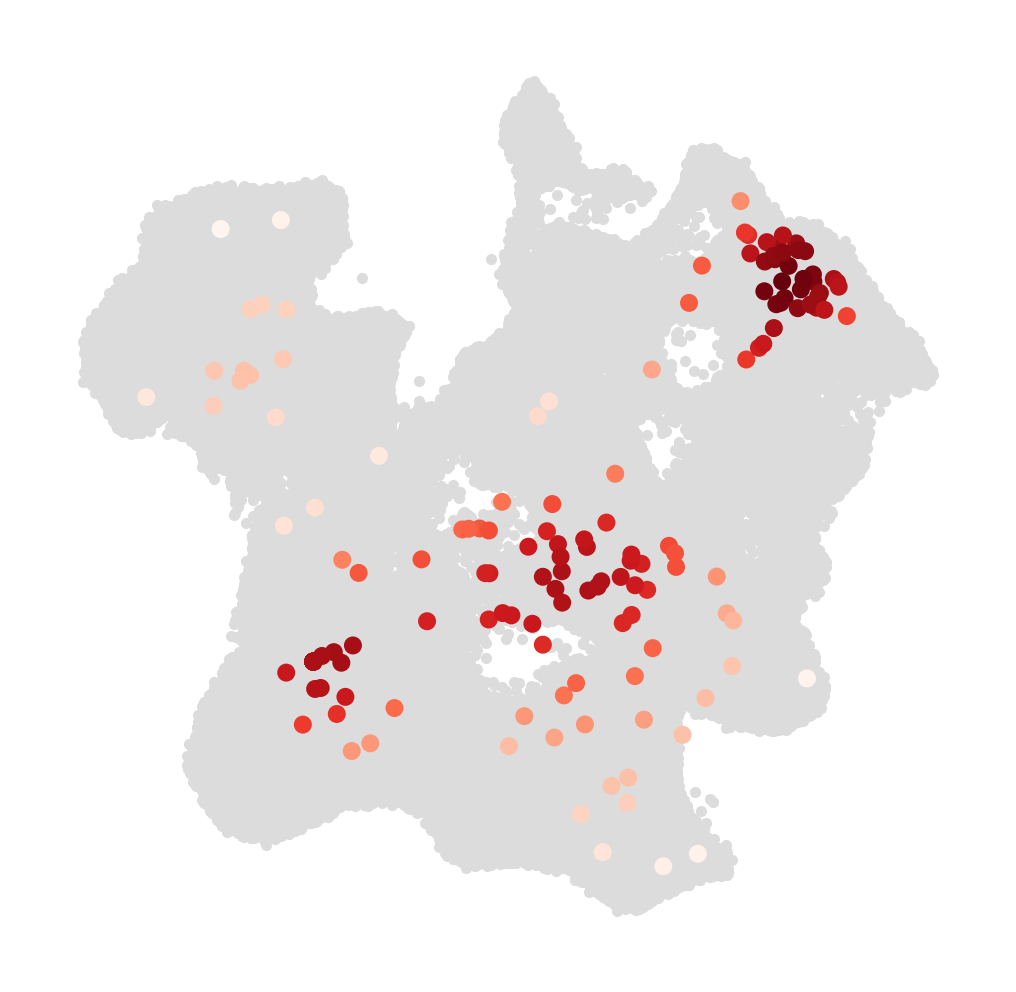

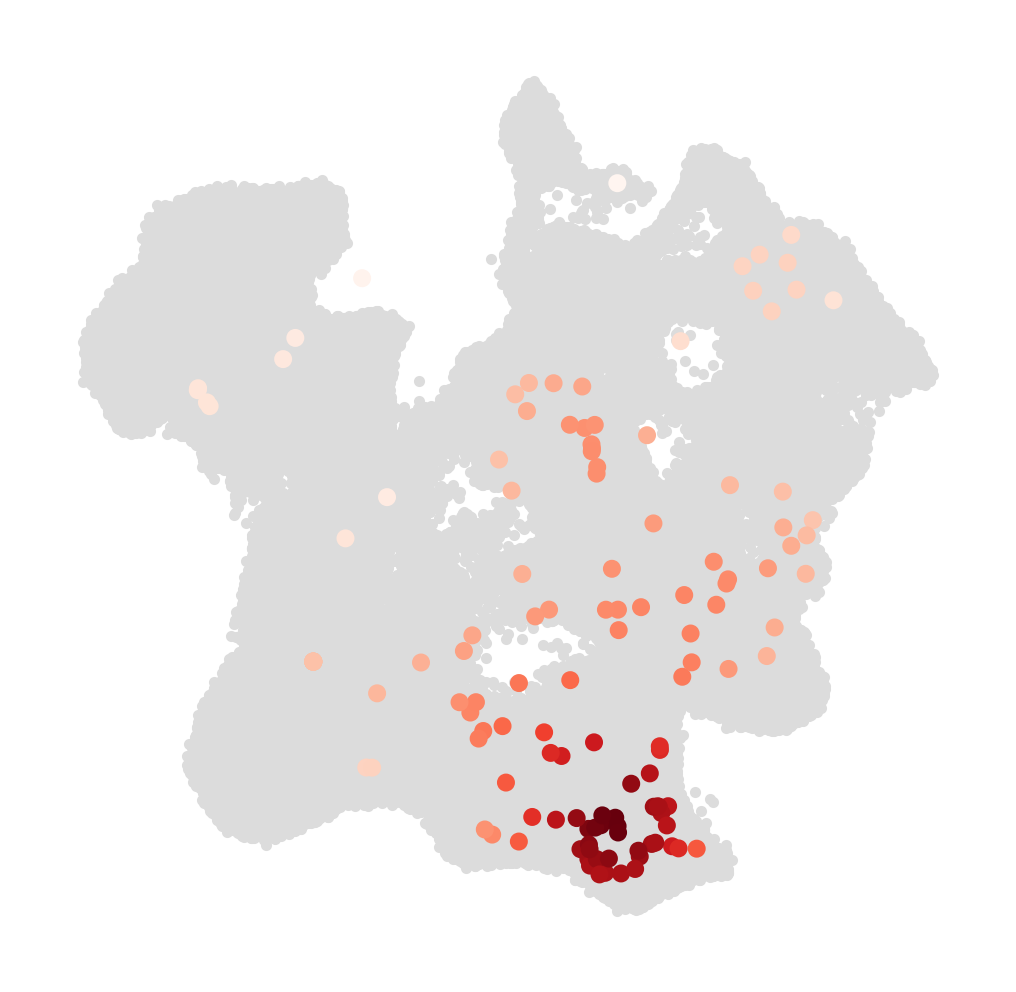

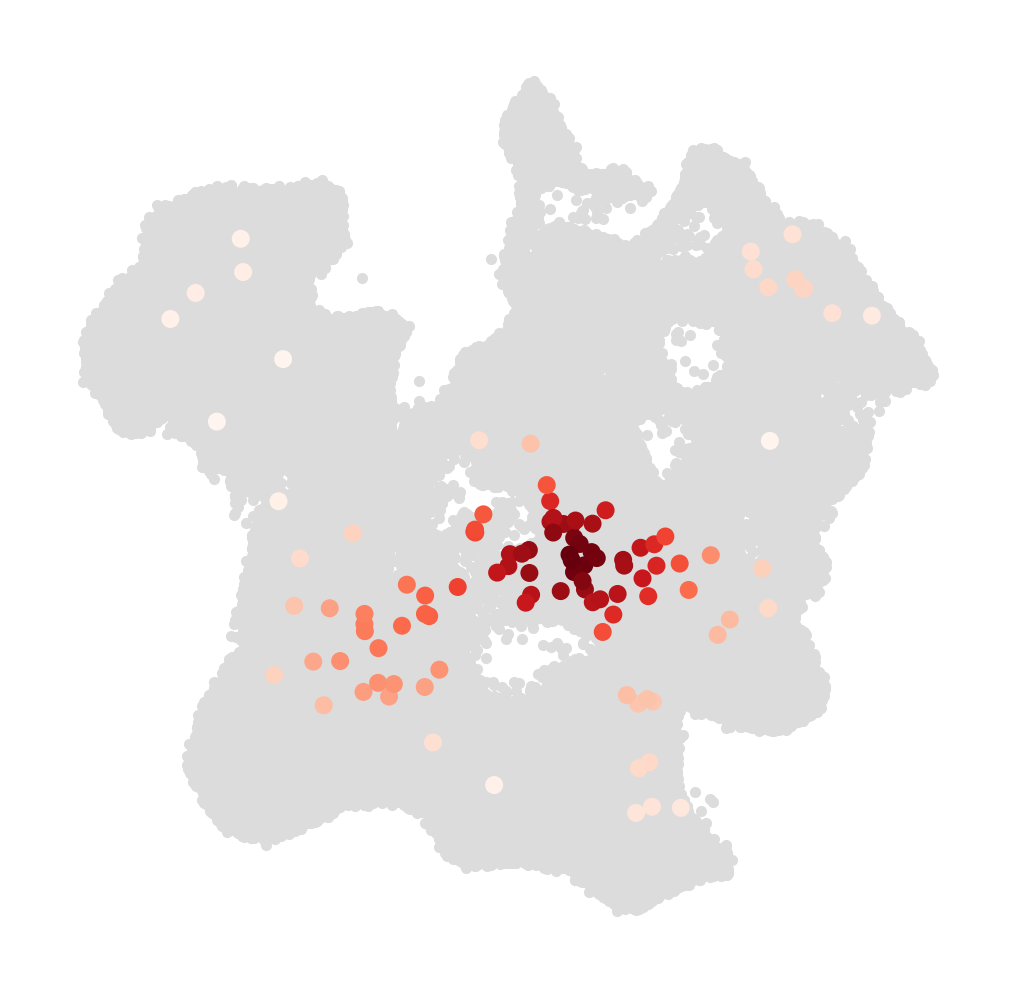

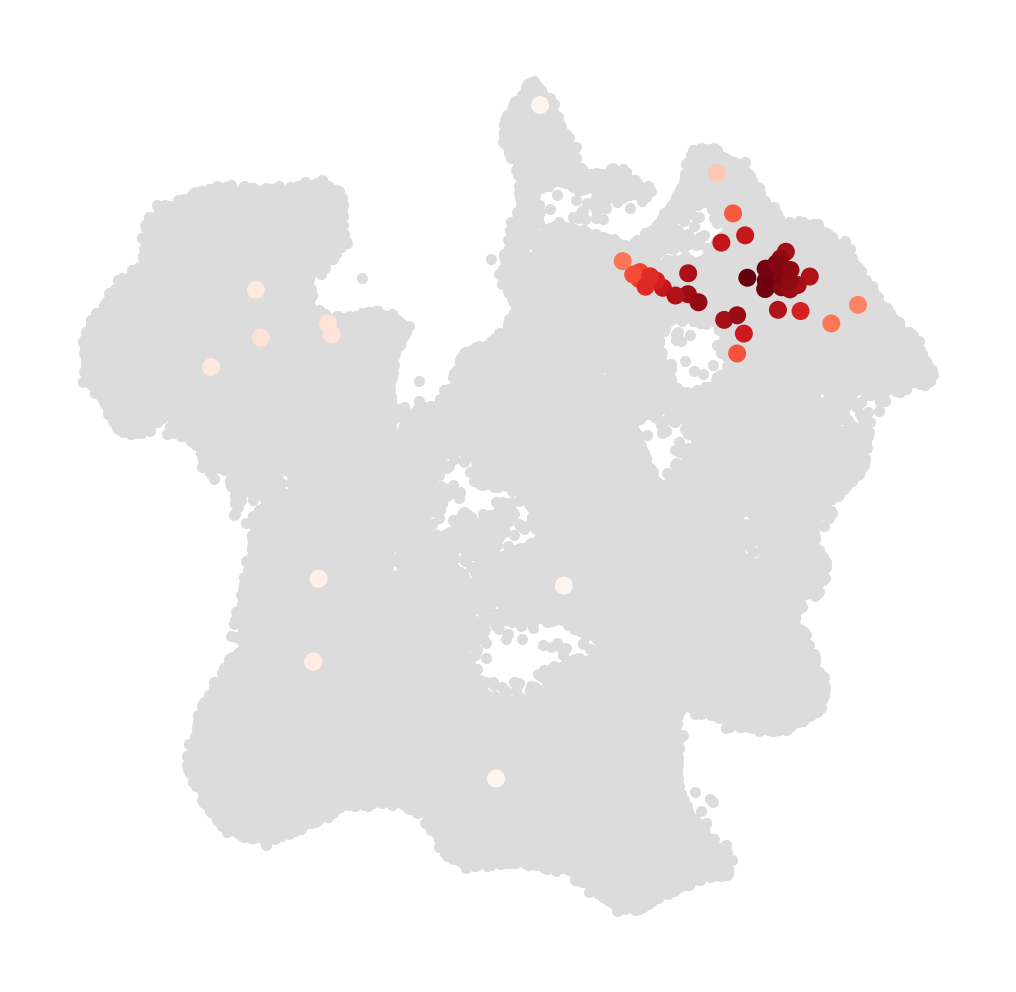

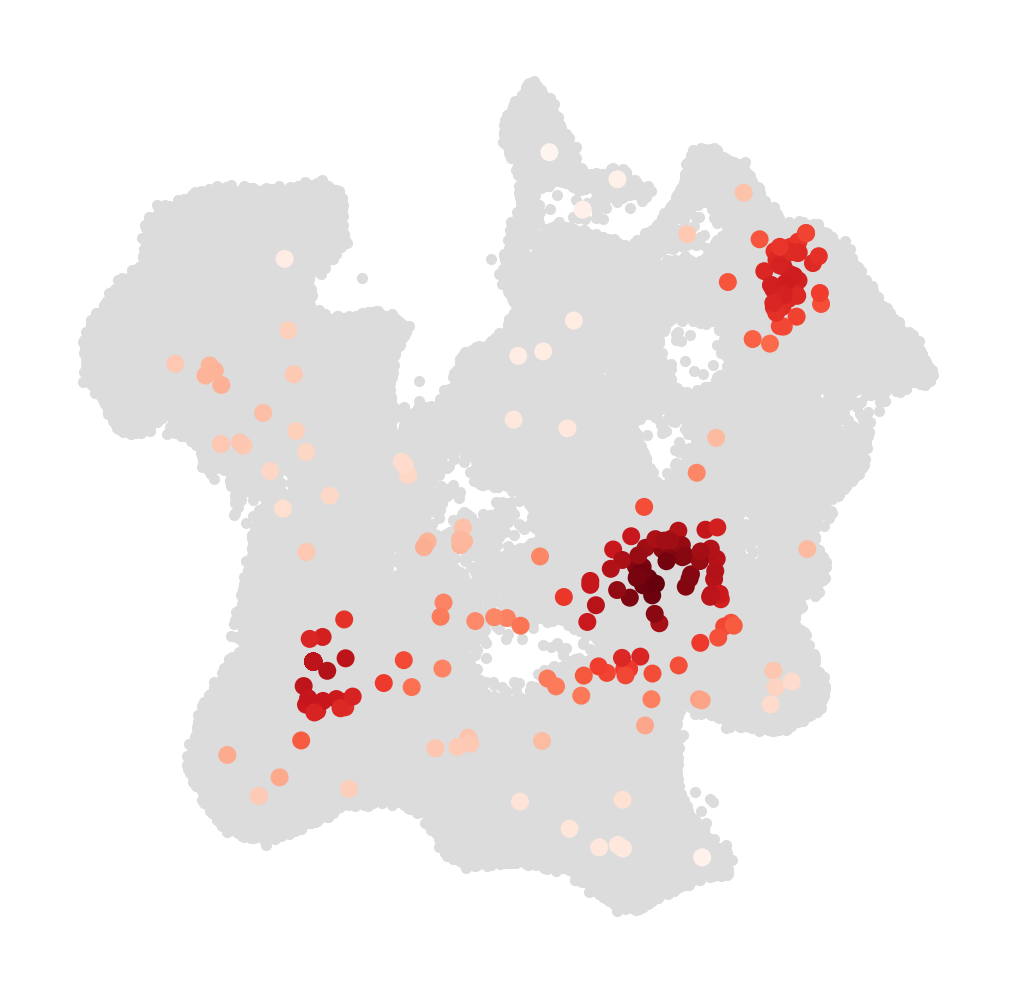

In [77]:
for label in ['TLX2','MSX1','TCF7L1','TCF7L2','NEUROD1','NFATC1','LHX9','LEF1','PHOX2B','EGFP']:

    meta_dens_label = meta_dens[meta_dens['final_label']=='label_'+label]
    
    plt.figure(figsize=(3,3))
    plt.scatter(meta_dens['proj_umap1'],meta_dens['proj_umap2'],s=1,c='gainsboro')
    plt.scatter(meta_dens_label['proj_umap1'],meta_dens_label['proj_umap2'],s=5,c=meta_dens_label['umap_density_final_label'],cmap='Reds',vmin=0,vmax=1)
    plt.xticks([])
    plt.yticks([])
    sns.despine(left=True,bottom=True)
    plt.savefig("figures/seurat_integration_final_label_"+label+"_density.png",dpi=350,bbox_inches='tight',pad_inches=0)
    plt.show()
    plt.close()

In [130]:
from matplotlib import colormaps
#from colorspacious import cspace_converter
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
cmaps = {}
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category}', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()
    
    # Save colormap list for later.
    cmaps[category] = cmap_list
    return(fig)

In [133]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

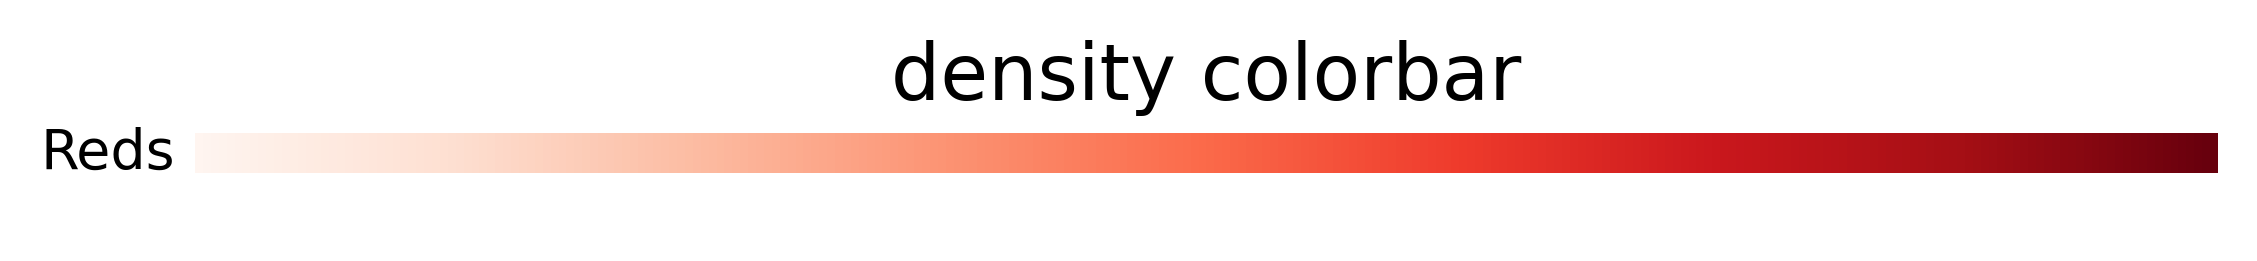

In [134]:
plot_color_gradients('density colorbar',
                     ['Reds'])
plt.savefig("figures/colorbar_reds_density.pdf",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()

In [99]:
meta_LT = pd.read_csv("seurat_withscreen/query_meta_pred_clustering_transfer_50PCs.tsv",sep="\t",index_col=0)

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x=B1[0],y=B1[1],s=1,c='gainsboro')
plt.scatter(x=C1[0],y=C1[1],s=1,c='k')
sns.despine(left=True,bottom=True)
plt.xticks([])
plt.yticks([])
plt.savefig("figures/seurat_integration_"+resolution+"_UMAP_experiment_projected.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()


In [111]:
C1_ass = C1.copy()
C1_ass['prediction.score.max'] = 0
C1_ass.loc[meta_LT.index,'prediction.score.max'] = meta_LT.loc[meta_LT.index,'prediction.score.max']

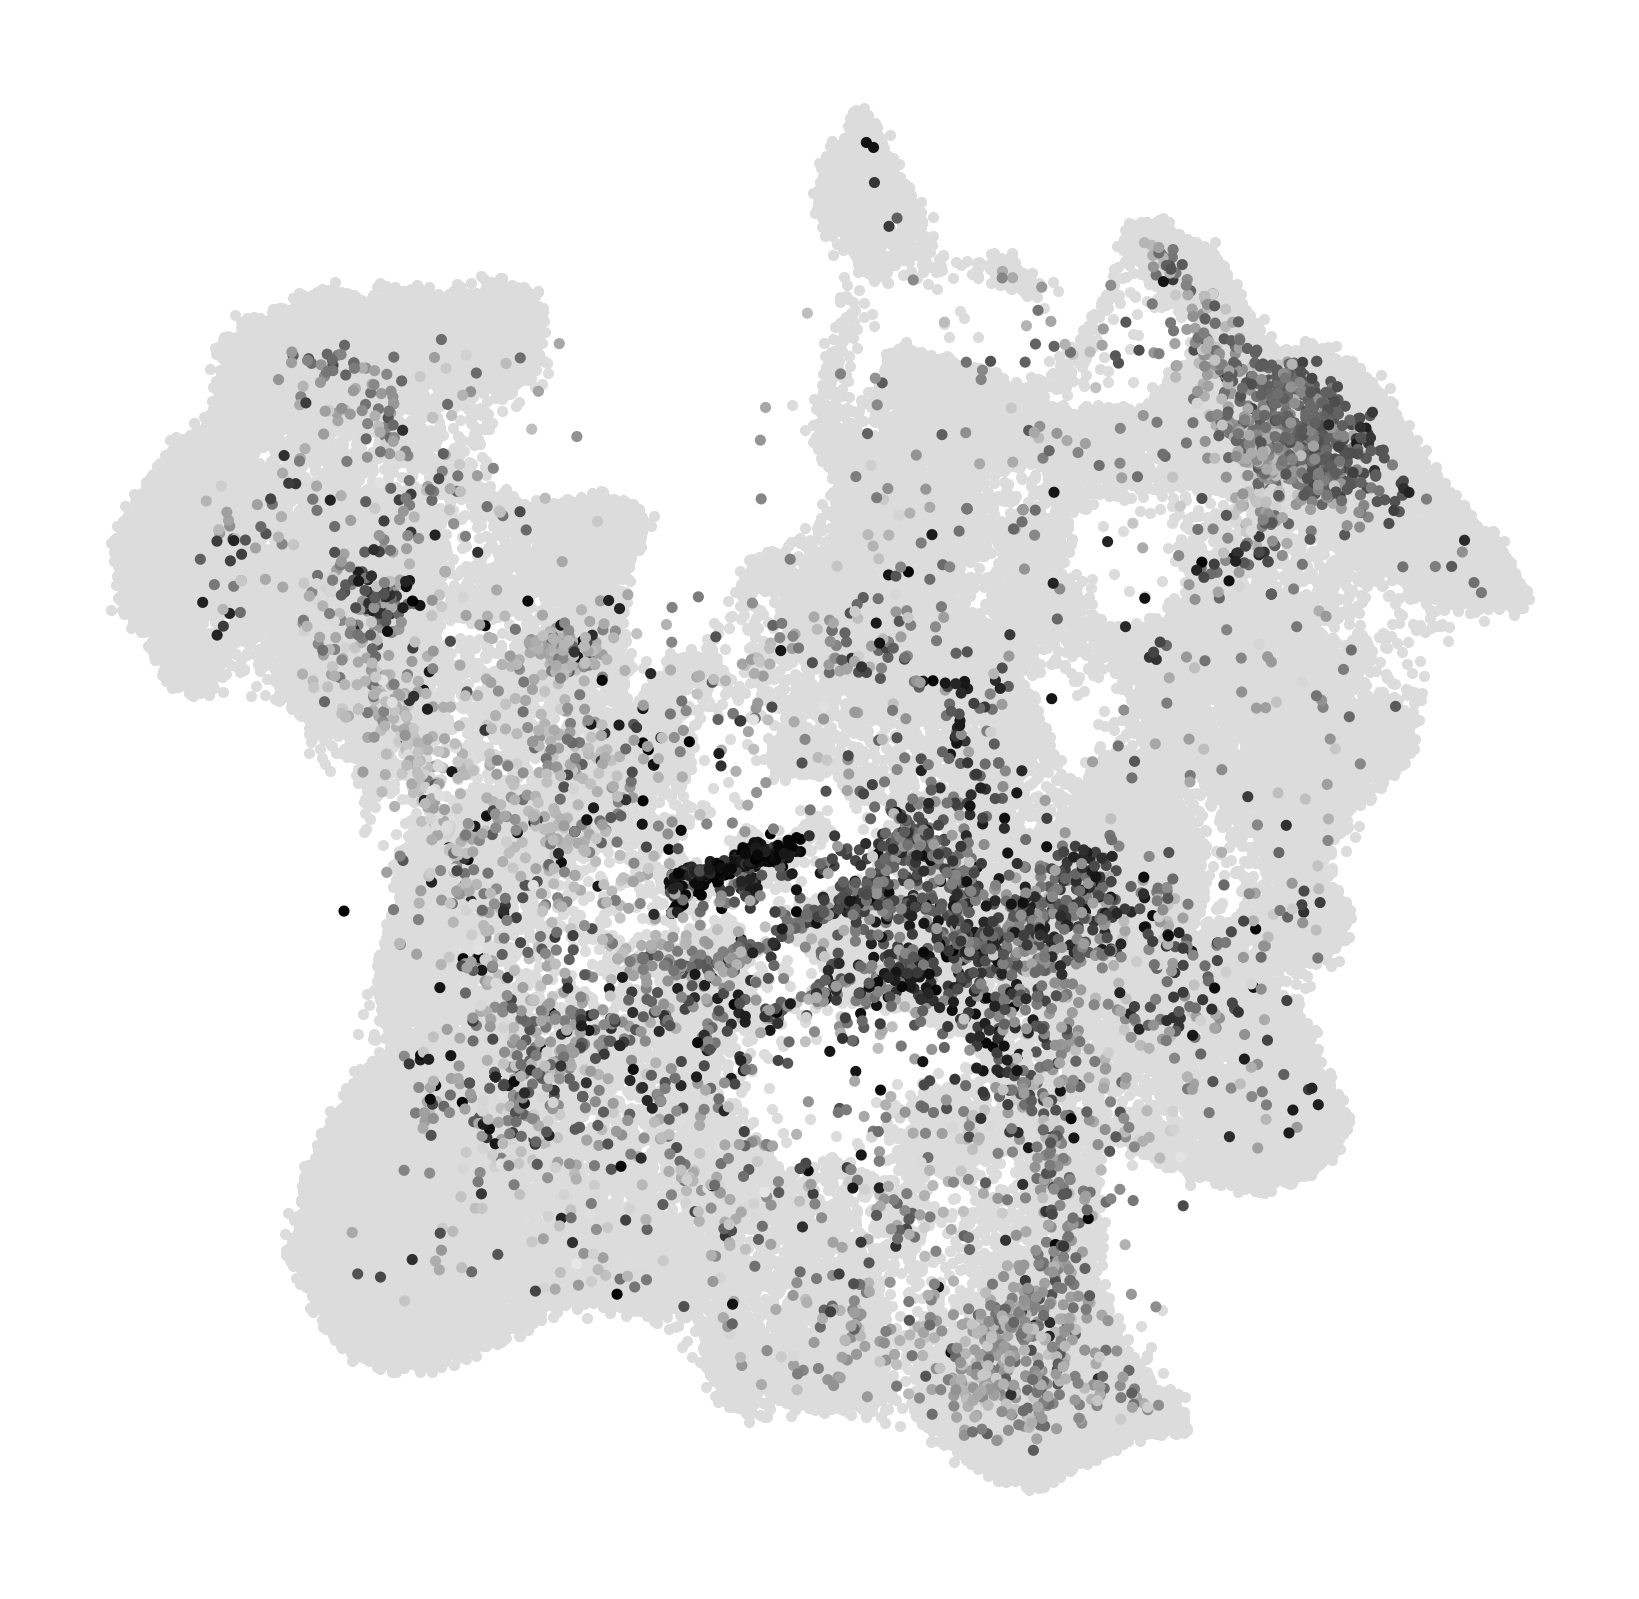

In [115]:
plt.figure(figsize=(5,5))
plt.scatter(x=B1[0],y=B1[1],s=1,c='gainsboro')
plt.scatter(x=C1_ass[0],y=C1_ass[1],s=1,c=C1_ass['prediction.score.max'],vmin=0,vmax=1,cmap='Greys')
sns.despine(left=True,bottom=True)
plt.xticks([])
plt.yticks([])
plt.savefig("figures/seurat_integration_"+resolution+"_UMAP_experiment_projected_LT_score.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()
